# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1260217713_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1713568869_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1527152775_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1863655430_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/324112183_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/141110631_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Usin

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1260217713_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]


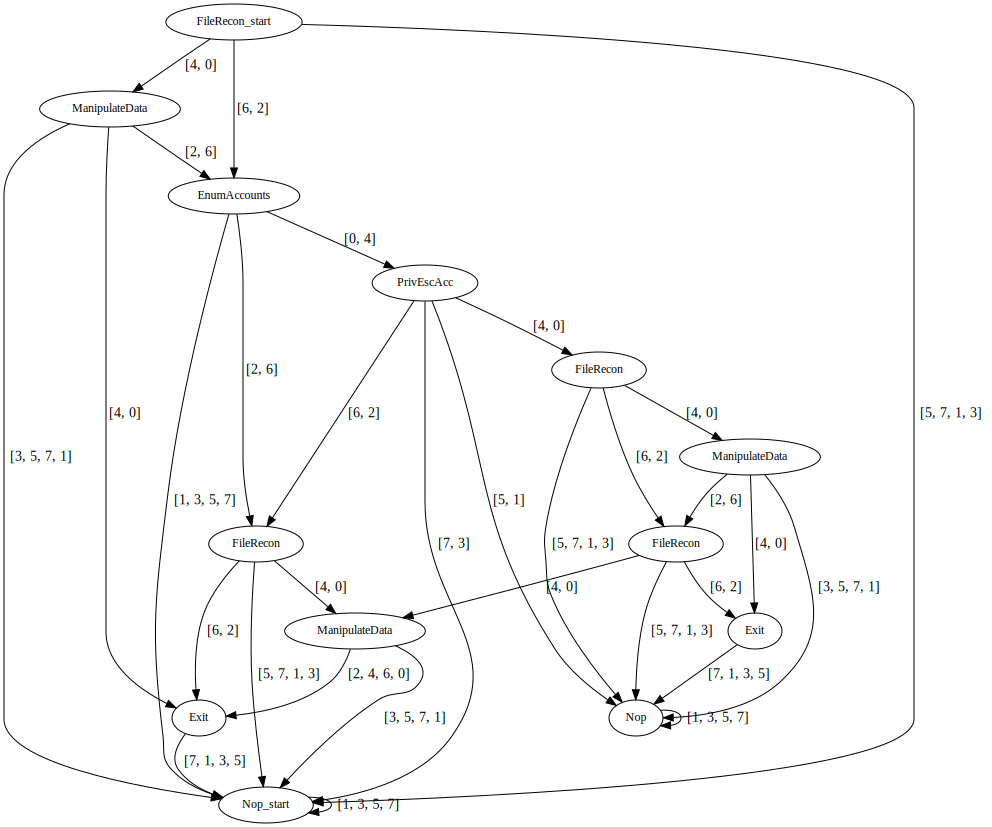

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1713568869_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


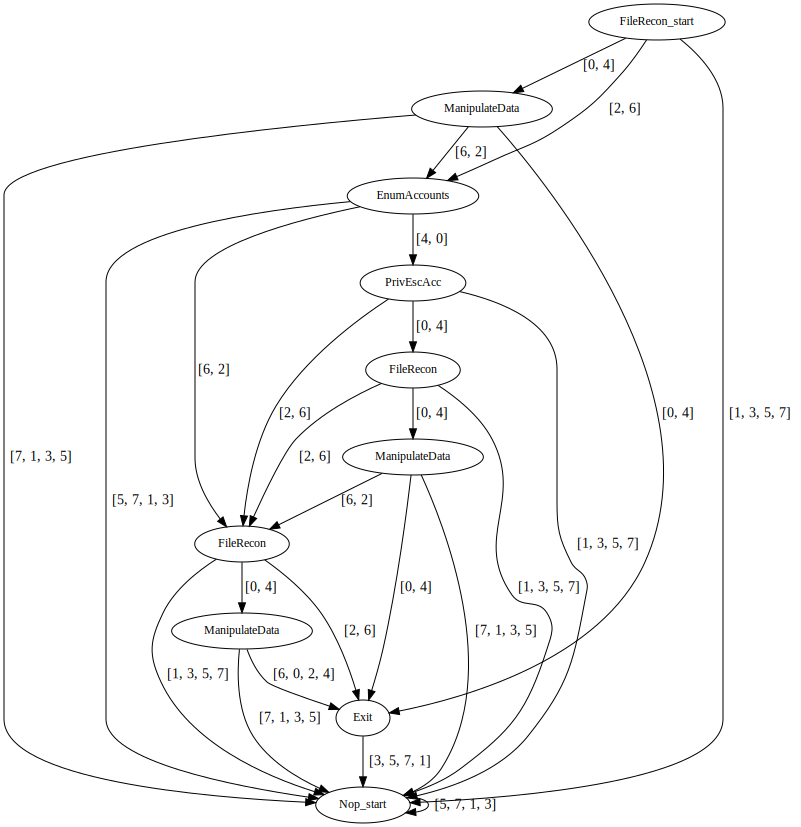

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1527152775_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


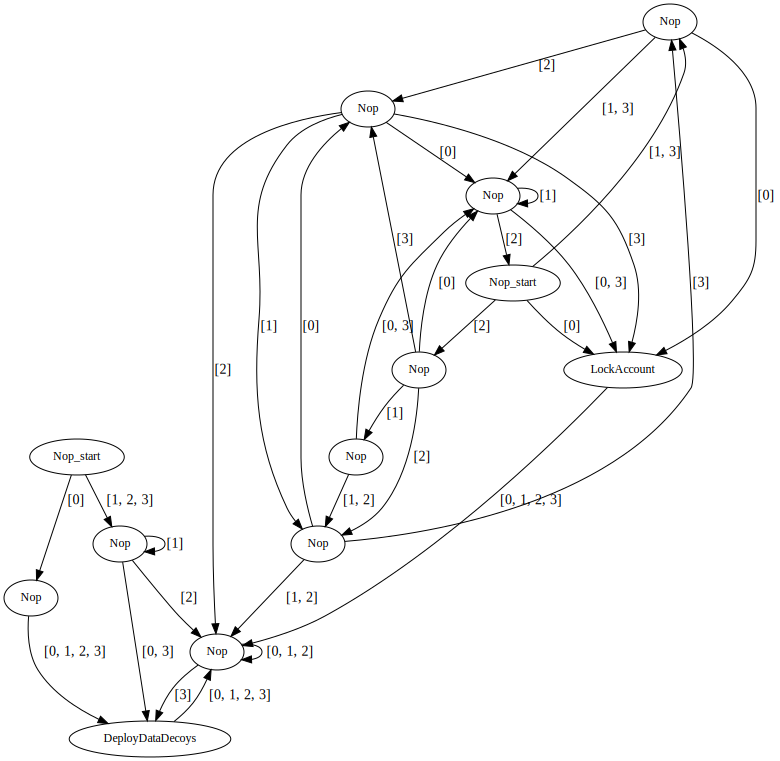

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1863655430_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


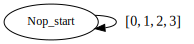

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/324112183_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]


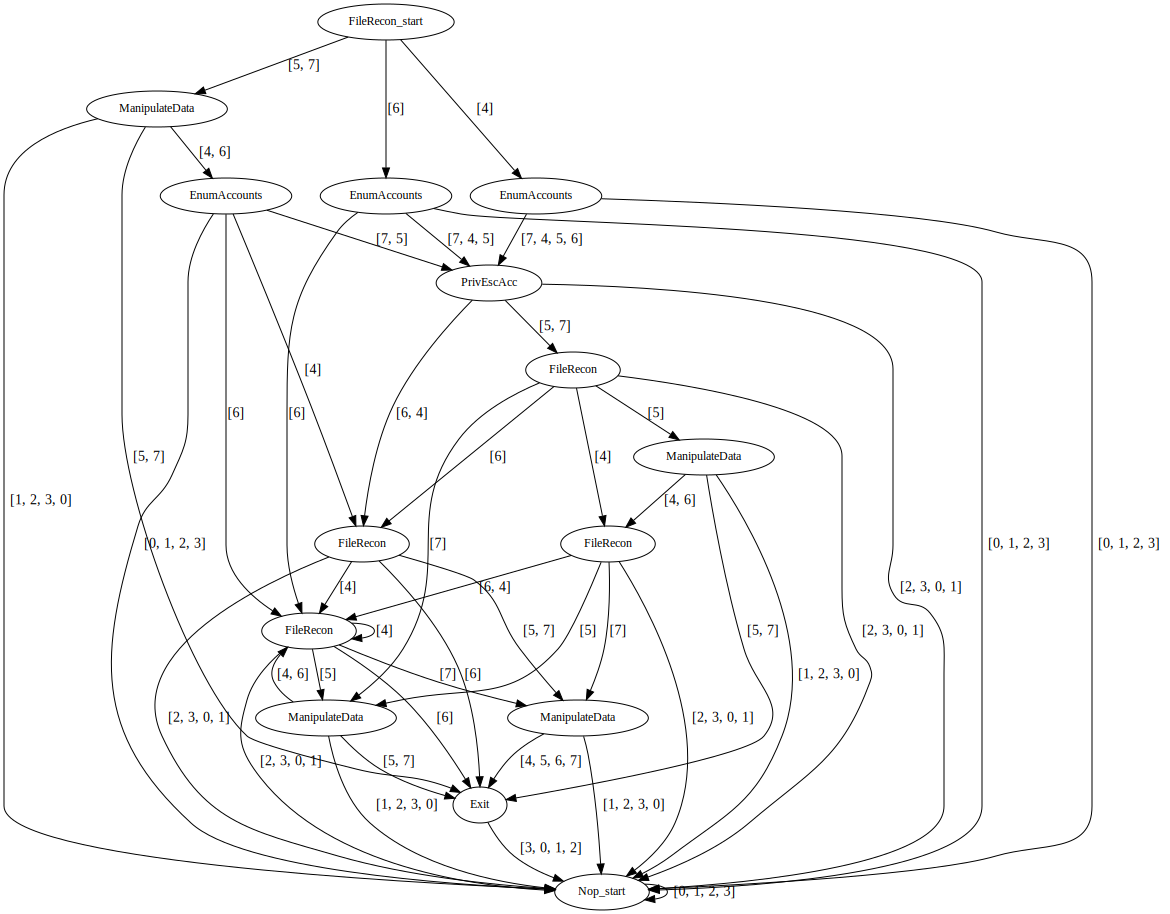

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/141110631_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


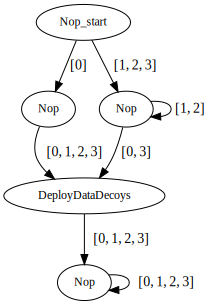

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_enum
2,1.0,su_login
3,1.0,file_enum
4,1.0,file_write
5,1.0,file_write
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


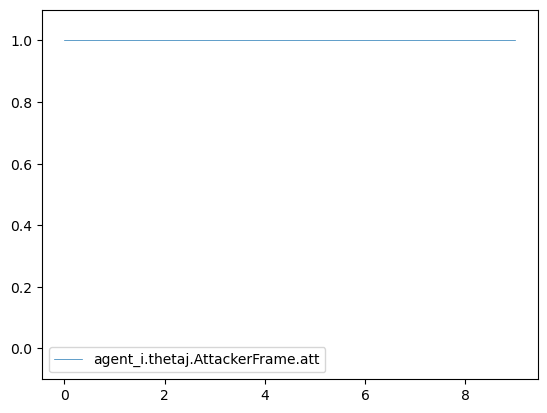

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,none,failure,active
1,0.500000,0.500000,none,success,active
2,0.485316,0.514684,none,success,active
3,0.485014,0.514986,none,success,active
4,0.673524,0.326476,user_files,success,active
5,0.713072,0.286928,none,success,inactive
6,0.713072,0.286928,user_files,success,inactive
7,0.713072,0.286928,none,failure,inactive
8,0.713072,0.286928,none,success,inactive
9,0.713072,0.286928,none,failure,inactive


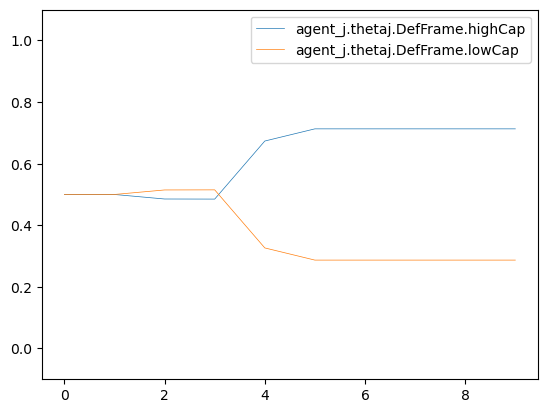

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


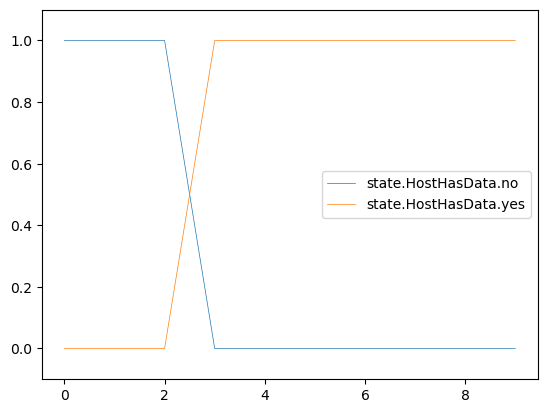

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,file_write
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


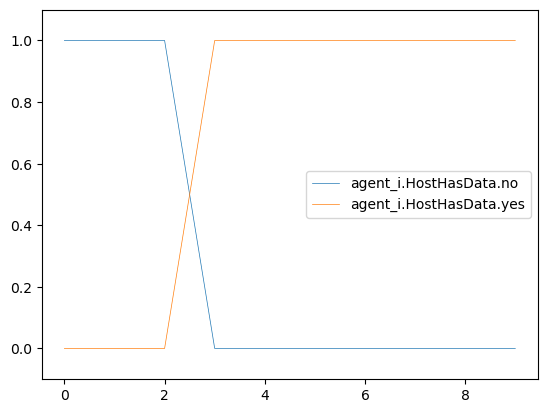

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,failure,active
1,0.608108,0.391892,EnumAccounts,Nop,none,success,active
2,0.608108,0.391892,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.313539,0.686461,FileRecon,Nop,none,success,active
4,0.055908,0.944092,ManipulateData,Nop,user_files,success,active
5,0.000061,0.999939,Exit,Nop,none,success,inactive
6,0.000061,0.999939,Nop,Nop,user_files,success,inactive
7,0.000061,0.999939,Nop,Nop,none,failure,inactive
8,0.000061,0.999939,Nop,Nop,none,success,inactive
9,0.000061,0.999939,Nop,Nop,none,failure,inactive


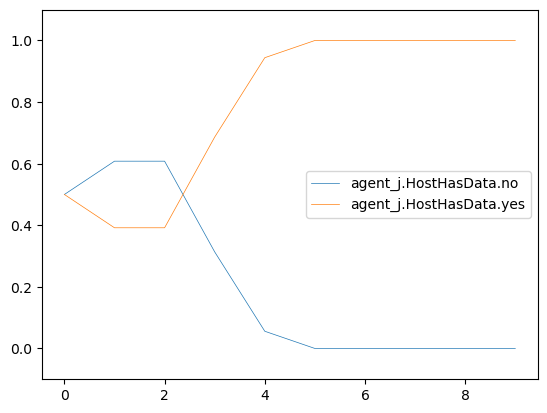

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


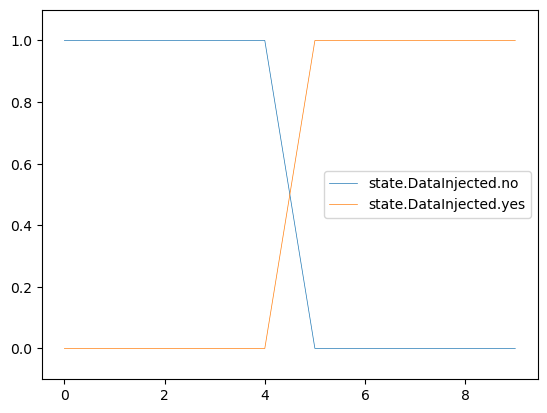

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,1.000000,0.000000,Nop,ManipulateData,file_write
5,0.032399,0.967601,Nop,Exit,file_write
6,0.003648,0.996352,Nop,Nop,none
7,0.002075,0.997924,Nop,Nop,none
8,0.002069,0.997931,Nop,Nop,none
9,0.002069,0.997931,Nop,Nop,none


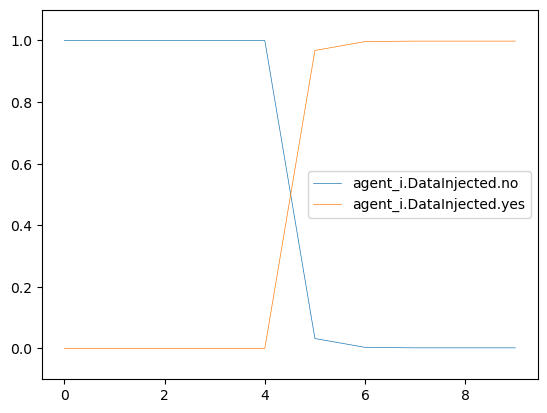

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,1.000000,0.000000,ManipulateData,Nop,user_files,success,active
5,0.000087,0.999913,Exit,Nop,none,success,inactive
6,0.000087,0.999913,Nop,Nop,user_files,success,inactive
7,0.000087,0.999913,Nop,Nop,none,failure,inactive
8,0.000087,0.999913,Nop,Nop,none,success,inactive
9,0.000087,0.999913,Nop,Nop,none,failure,inactive


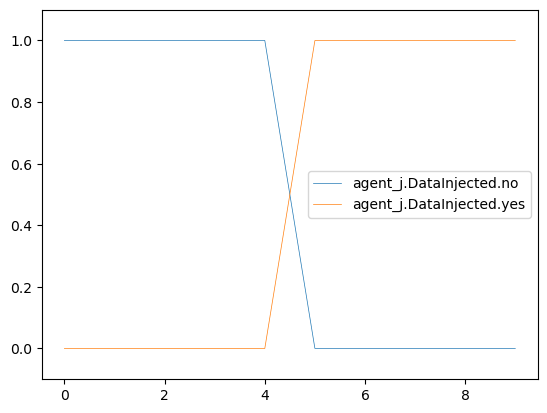

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,FileRecon
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,ManipulateData
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


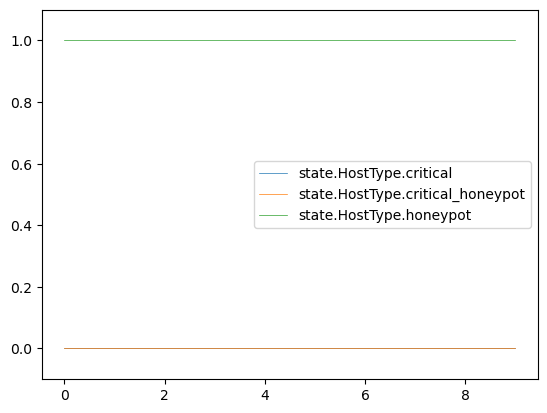

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,0.0,1.0,Nop,Exit,file_write
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,none


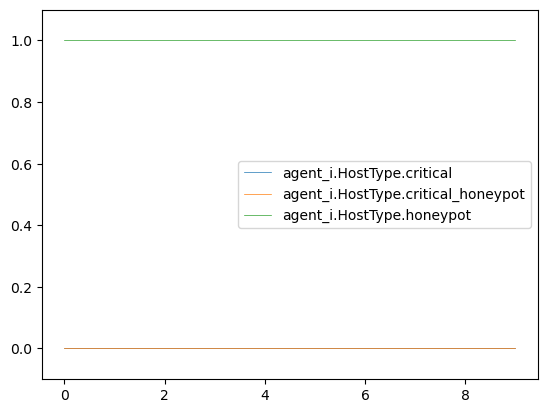

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.0,0.500000,FileRecon,Nop,none,failure,active
1,0.200000,0.0,0.800000,EnumAccounts,Nop,none,success,active
2,0.031184,0.0,0.968816,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.030614,0.0,0.969386,FileRecon,Nop,none,success,active
4,0.005025,0.0,0.994975,ManipulateData,Nop,user_files,success,active
5,0.004414,0.0,0.995586,Exit,Nop,none,success,inactive
6,0.004414,0.0,0.995586,Nop,Nop,user_files,success,inactive
7,0.004414,0.0,0.995586,Nop,Nop,none,failure,inactive
8,0.004414,0.0,0.995586,Nop,Nop,none,success,inactive
9,0.004414,0.0,0.995586,Nop,Nop,none,failure,inactive


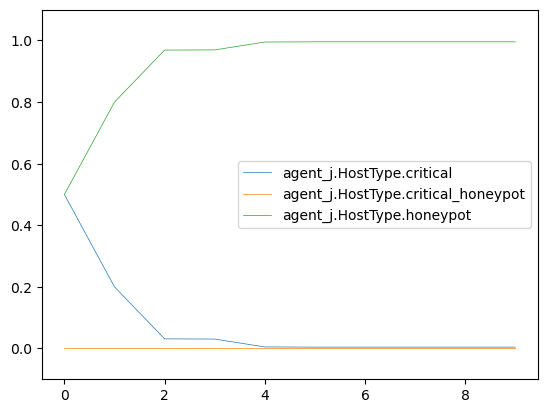

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


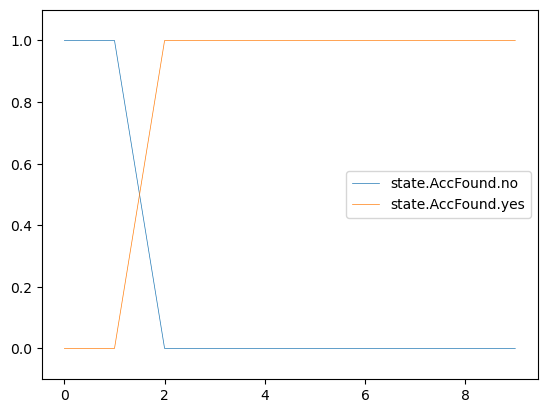

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,0.011249,0.988751,DeployDataDecoys,PrivEscAcc,su_login
3,0.009686,0.990314,Nop,FileRecon,file_enum
4,0.009684,0.990316,Nop,ManipulateData,file_write
5,0.001899,0.998101,Nop,Exit,file_write
6,0.001899,0.998101,Nop,Nop,none
7,0.001861,0.998139,Nop,Nop,none
8,0.001861,0.998139,Nop,Nop,none
9,0.001861,0.998139,Nop,Nop,none


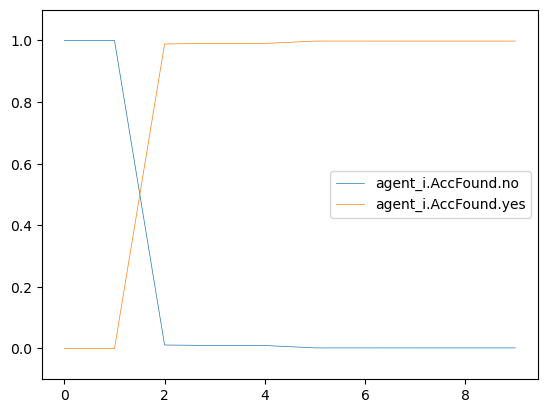

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,0.101815,0.898186,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.000113,0.999887,FileRecon,Nop,none,success,active
4,0.000053,0.999947,ManipulateData,Nop,user_files,success,active
5,0.000040,0.999960,Exit,Nop,none,success,inactive
6,0.000040,0.999960,Nop,Nop,user_files,success,inactive
7,0.000040,0.999960,Nop,Nop,none,failure,inactive
8,0.000040,0.999960,Nop,Nop,none,success,inactive
9,0.000040,0.999960,Nop,Nop,none,failure,inactive


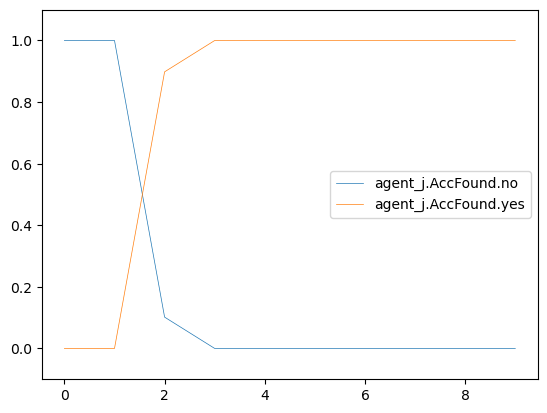

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


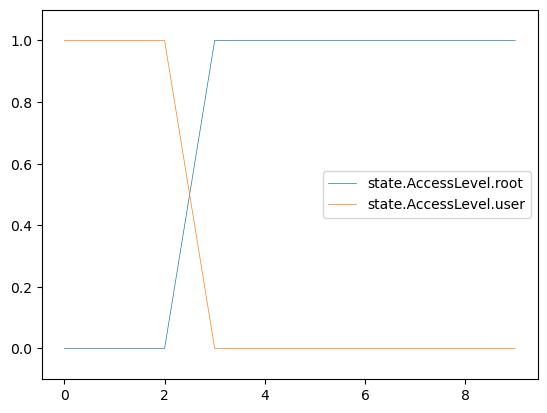

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,EnumAccounts,file_enum
2,0.000000,1.000000,DeployDataDecoys,PrivEscAcc,su_login
3,0.990261,0.009739,Nop,FileRecon,file_enum
4,0.990285,0.009715,Nop,ManipulateData,file_write
5,0.998095,0.001905,Nop,Exit,file_write
6,0.998098,0.001902,Nop,Nop,none
7,0.998136,0.001864,Nop,Nop,none
8,0.998136,0.001863,Nop,Nop,none
9,0.998137,0.001863,Nop,Nop,none


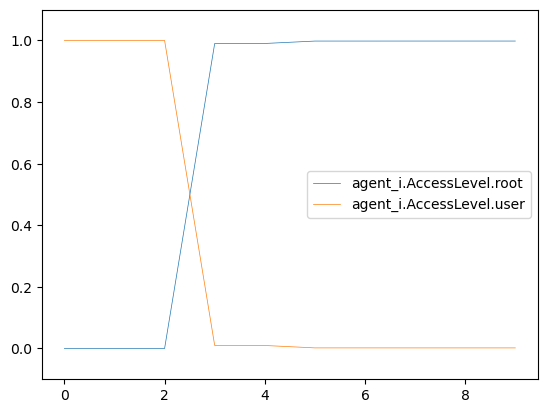

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,FileRecon,Nop,none,failure,active
1,0.000000,1.000000,EnumAccounts,Nop,none,success,active
2,0.000000,1.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.999887,0.000113,FileRecon,Nop,none,success,active
4,0.999947,0.000053,ManipulateData,Nop,user_files,success,active
5,0.999960,0.000040,Exit,Nop,none,success,inactive
6,0.999960,0.000040,Nop,Nop,user_files,success,inactive
7,0.999960,0.000040,Nop,Nop,none,failure,inactive
8,0.999960,0.000040,Nop,Nop,none,success,inactive
9,0.999960,0.000040,Nop,Nop,none,failure,inactive


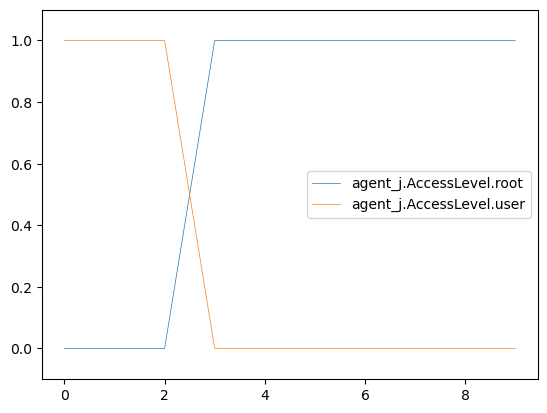

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


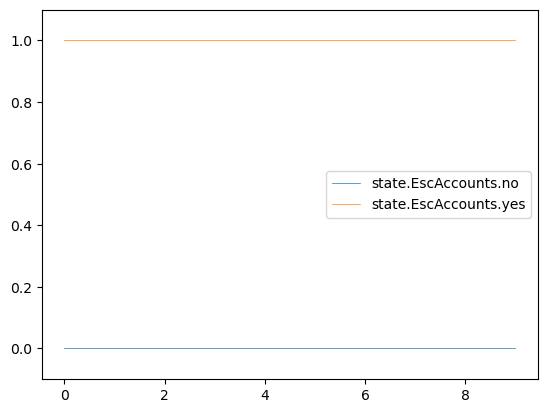

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,file_write
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


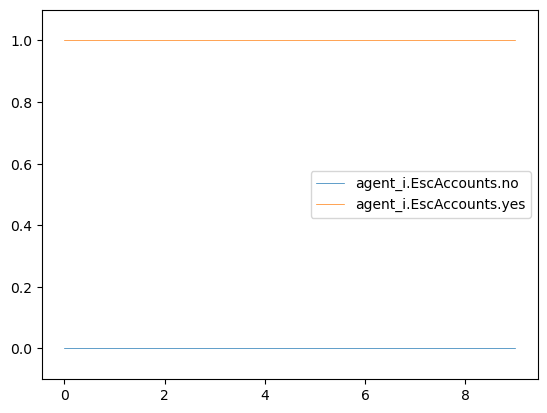

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,failure,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.100806,0.899194,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.000112,0.999888,FileRecon,Nop,none,success,active
4,0.000053,0.999947,ManipulateData,Nop,user_files,success,active
5,0.000039,0.999961,Exit,Nop,none,success,inactive
6,0.000039,0.999961,Nop,Nop,user_files,success,inactive
7,0.000039,0.999961,Nop,Nop,none,failure,inactive
8,0.000039,0.999961,Nop,Nop,none,success,inactive
9,0.000039,0.999961,Nop,Nop,none,failure,inactive


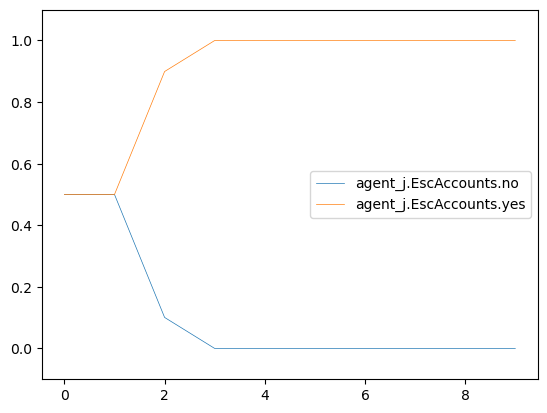

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


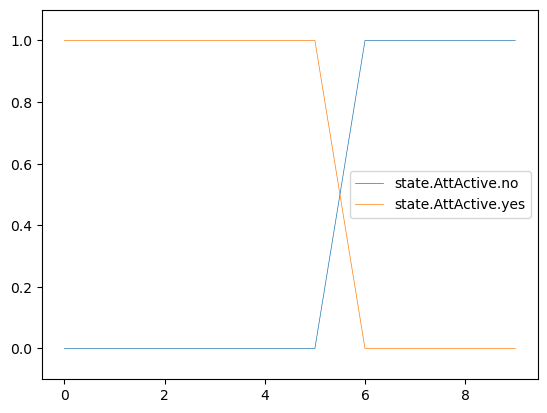

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,5.000000e-01,5.000000e-01,Nop,FileRecon,file_enum
1,1.020408e-02,9.897959e-01,Nop,EnumAccounts,file_enum
2,1.179412e-04,9.998821e-01,DeployDataDecoys,PrivEscAcc,su_login
3,1.234496e-06,9.999988e-01,Nop,FileRecon,file_enum
4,9.572710e-08,9.999998e-01,Nop,ManipulateData,file_write
5,5.032518e-04,9.994968e-01,Nop,Exit,file_write
6,9.844862e-01,1.551385e-02,Nop,Nop,none
7,9.999790e-01,2.107686e-05,Nop,Nop,none
8,9.999999e-01,9.070315e-08,Nop,Nop,none
9,1.000000e+00,3.055551e-10,Nop,Nop,none


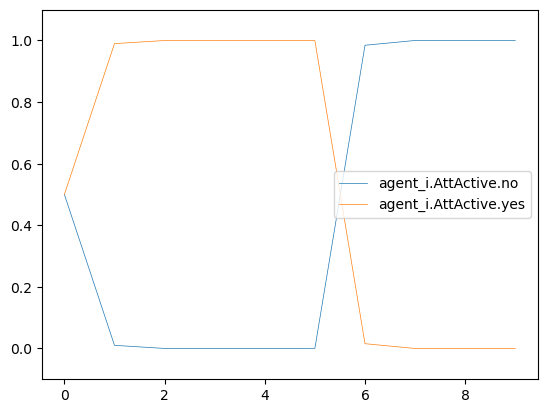

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,none,failure,active
1,0.0,1.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.0,1.0,FileRecon,Nop,none,success,active
4,0.0,1.0,ManipulateData,Nop,user_files,success,active
5,0.0,1.0,Exit,Nop,none,success,inactive
6,1.0,0.0,Nop,Nop,user_files,success,inactive
7,1.0,0.0,Nop,Nop,none,failure,inactive
8,1.0,0.0,Nop,Nop,none,success,inactive
9,1.0,0.0,Nop,Nop,none,failure,inactive


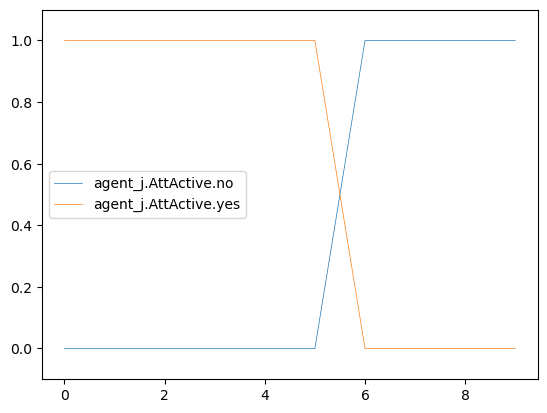

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


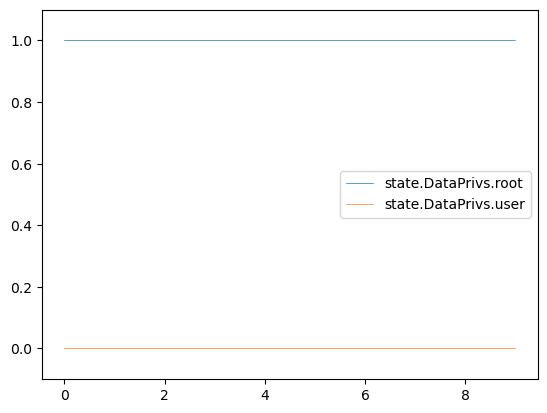

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,Nop,Exit,file_write
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


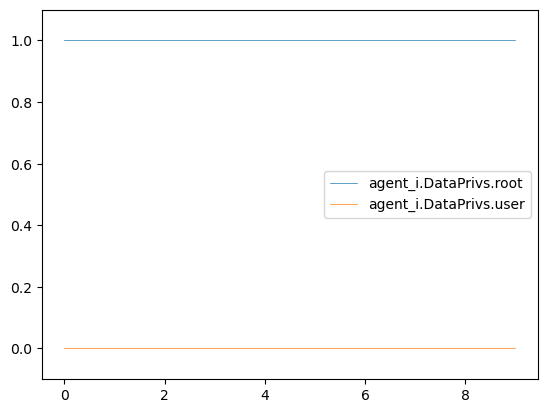

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,failure,active
1,0.608108,0.391892,EnumAccounts,Nop,none,success,active
2,0.608108,0.391892,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.608108,0.391892,FileRecon,Nop,none,success,active
4,0.641991,0.358009,ManipulateData,Nop,user_files,success,active
5,0.649545,0.350455,Exit,Nop,none,success,inactive
6,0.649545,0.350455,Nop,Nop,user_files,success,inactive
7,0.649545,0.350455,Nop,Nop,none,failure,inactive
8,0.649545,0.350455,Nop,Nop,none,success,inactive
9,0.649545,0.350455,Nop,Nop,none,failure,inactive


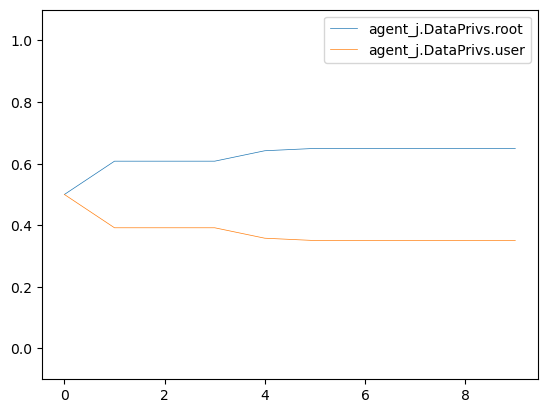

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


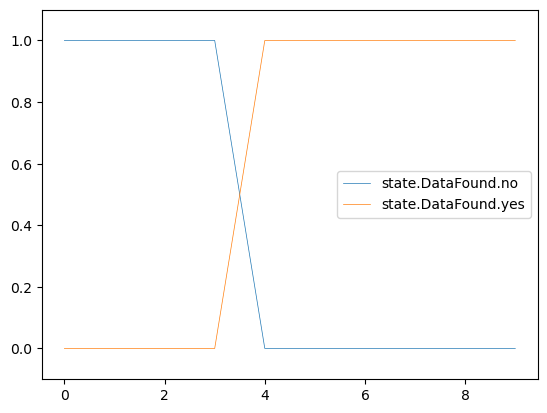

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,0.207772,0.792228,Nop,ManipulateData,file_write
5,0.029292,0.970708,Nop,Exit,file_write
6,0.002508,0.997492,Nop,Nop,none
7,0.002048,0.997952,Nop,Nop,none
8,0.002046,0.997954,Nop,Nop,none
9,0.002046,0.997954,Nop,Nop,none


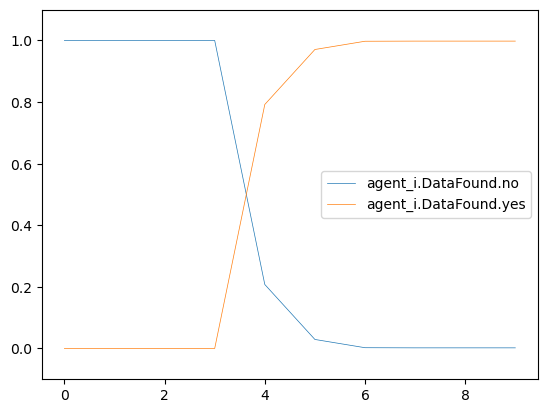

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,failure,active
1,0.972973,0.027027,EnumAccounts,Nop,none,success,active
2,0.972973,0.027027,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.972973,0.027027,FileRecon,Nop,none,success,active
4,0.080265,0.919735,ManipulateData,Nop,user_files,success,active
5,0.000087,0.999913,Exit,Nop,none,success,inactive
6,0.000087,0.999913,Nop,Nop,user_files,success,inactive
7,0.000087,0.999913,Nop,Nop,none,failure,inactive
8,0.000087,0.999913,Nop,Nop,none,success,inactive
9,0.000087,0.999913,Nop,Nop,none,failure,inactive


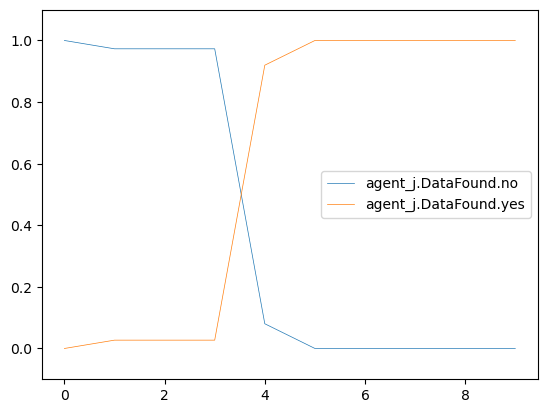

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_write
2,1.0,file_enum
3,1.0,file_enum
4,1.0,file_enum
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


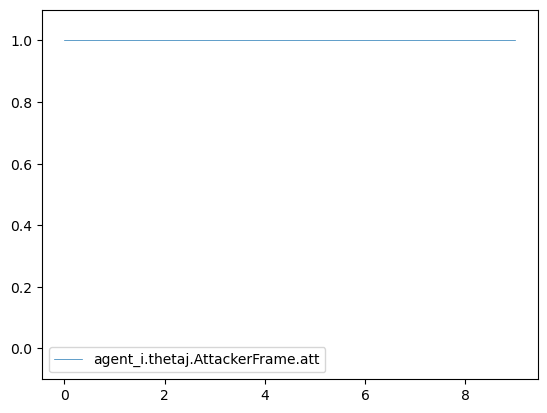

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,none,success,active
1,0.500000,0.500000,user_files,failure,active
2,0.446290,0.553710,none,failure,active
3,0.485313,0.514687,none,failure,active
4,0.432652,0.567348,user_files,failure,active
5,0.394766,0.605234,user_files,failure,inactive
6,0.394766,0.605234,user_files,failure,inactive
7,0.394766,0.605234,user_files,failure,inactive
8,0.394766,0.605234,none,success,inactive
9,0.394766,0.605234,none,failure,inactive


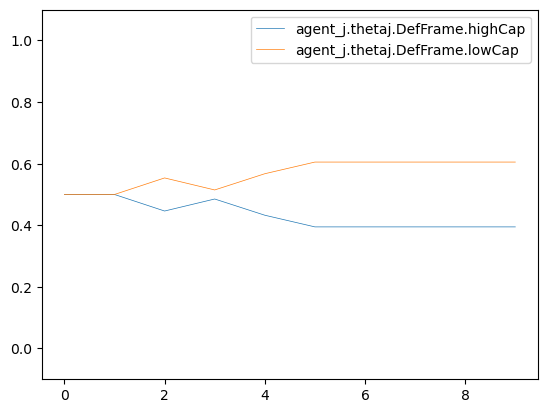

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,EnumAccounts
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


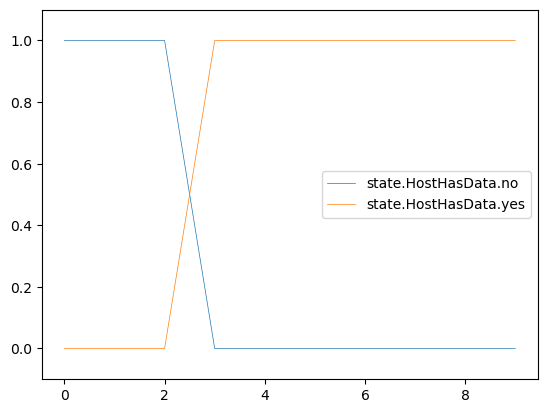

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,ManipulateData,file_write
2,1.0,0.0,DeployDataDecoys,EnumAccounts,file_enum
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,FileRecon,file_enum
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


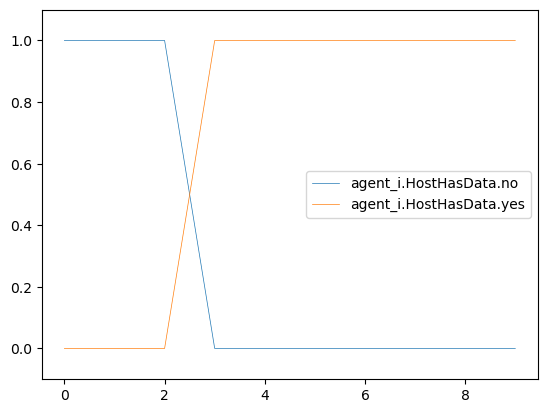

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,success,active
1,0.192308,0.807692,ManipulateData,Nop,user_files,failure,active
2,0.623596,0.376404,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.330400,0.669600,FileRecon,Nop,none,failure,active
4,0.371369,0.628631,FileRecon,Nop,user_files,failure,active
5,0.401900,0.598100,Exit,Nop,user_files,failure,inactive
6,0.401896,0.598103,Nop,Nop,user_files,failure,inactive
7,0.401894,0.598106,Nop,Nop,user_files,failure,inactive
8,0.401892,0.598108,Nop,Nop,none,success,inactive
9,0.401890,0.598110,Nop,Nop,none,failure,inactive


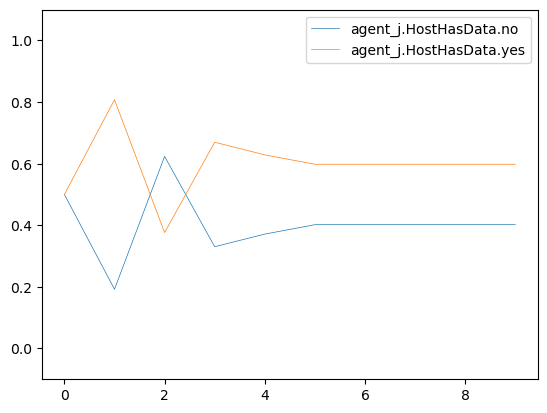

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,EnumAccounts
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


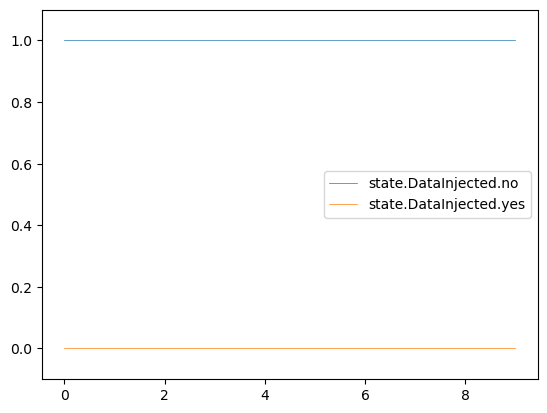

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,ManipulateData,file_write
2,1.000000,0.000000,DeployDataDecoys,EnumAccounts,file_enum
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,1.000000,0.000000,Nop,FileRecon,file_enum
5,0.999920,0.000080,Nop,Exit,none
6,0.993834,0.006166,Nop,Nop,none
7,0.993525,0.006475,Nop,Nop,none
8,0.993522,0.006478,Nop,Nop,none
9,0.993522,0.006478,Nop,Nop,none


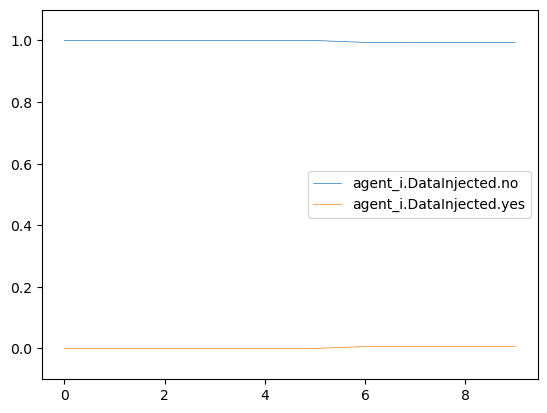

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,success,active
1,1.000000,0.000000,ManipulateData,Nop,user_files,failure,active
2,0.997753,0.002247,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.997753,0.002247,FileRecon,Nop,none,failure,active
4,0.999705,0.000295,FileRecon,Nop,user_files,failure,active
5,0.999965,0.000035,Exit,Nop,user_files,failure,inactive
6,0.999965,0.000035,Nop,Nop,user_files,failure,inactive
7,0.999965,0.000035,Nop,Nop,user_files,failure,inactive
8,0.999965,0.000035,Nop,Nop,none,success,inactive
9,0.999965,0.000035,Nop,Nop,none,failure,inactive


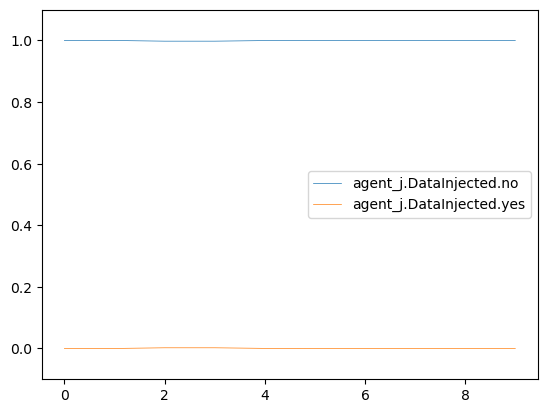

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,FileRecon
1,0.0,0.0,1.0,Nop,ManipulateData
2,0.0,0.0,1.0,DeployDataDecoys,EnumAccounts
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,FileRecon
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


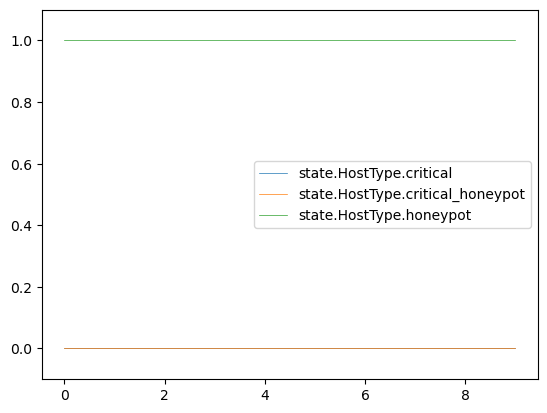

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,0.0,1.0,Nop,ManipulateData,file_write
2,0.0,0.0,1.0,DeployDataDecoys,EnumAccounts,file_enum
3,0.0,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,0.0,1.0,Nop,FileRecon,file_enum
5,0.0,0.0,1.0,Nop,Exit,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,none


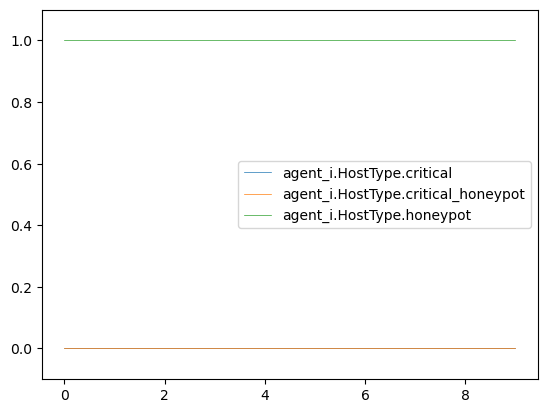

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.0,0.500000,FileRecon,Nop,none,success,active
1,0.200000,0.0,0.800000,ManipulateData,Nop,user_files,failure,active
2,0.114064,0.0,0.885936,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.031178,0.0,0.968822,FileRecon,Nop,none,failure,active
4,0.008820,0.0,0.991180,FileRecon,Nop,user_files,failure,active
5,0.035620,0.0,0.964380,Exit,Nop,user_files,failure,inactive
6,0.035620,0.0,0.964380,Nop,Nop,user_files,failure,inactive
7,0.035620,0.0,0.964380,Nop,Nop,user_files,failure,inactive
8,0.035620,0.0,0.964380,Nop,Nop,none,success,inactive
9,0.035620,0.0,0.964380,Nop,Nop,none,failure,inactive


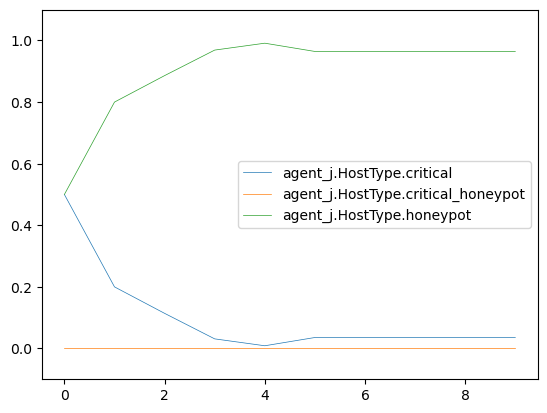

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,EnumAccounts
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


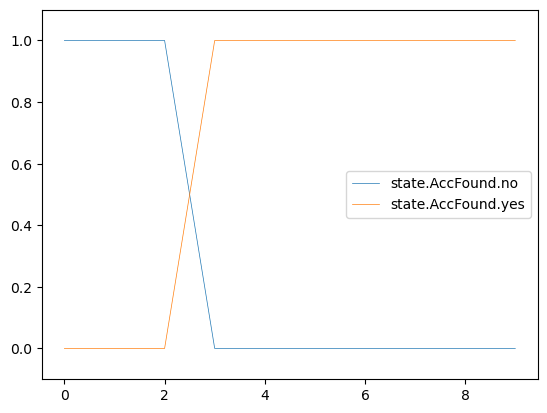

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,ManipulateData,file_write
2,0.917547,0.082453,DeployDataDecoys,EnumAccounts,file_enum
3,0.010256,0.989744,Nop,FileRecon,file_enum
4,0.076376,0.923624,Nop,FileRecon,file_enum
5,0.074546,0.925454,Nop,Exit,none
6,0.082819,0.917181,Nop,Nop,none
7,0.082974,0.917026,Nop,Nop,none
8,0.082975,0.917025,Nop,Nop,none
9,0.082975,0.917025,Nop,Nop,none


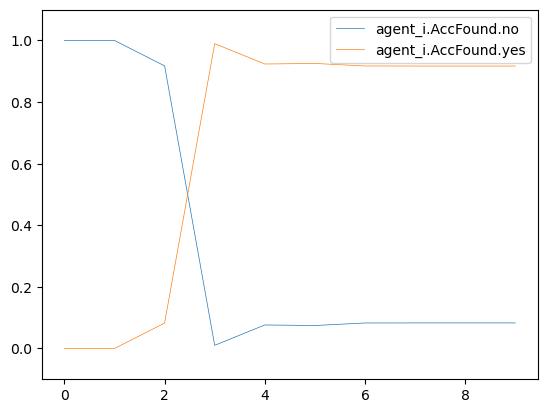

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,success,active
1,1.000000,0.000000,ManipulateData,Nop,user_files,failure,active
2,1.000000,0.000000,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.901786,0.098214,FileRecon,Nop,none,failure,active
4,0.901786,0.098214,FileRecon,Nop,user_files,failure,active
5,0.901786,0.098214,Exit,Nop,user_files,failure,inactive
6,0.901786,0.098214,Nop,Nop,user_files,failure,inactive
7,0.901786,0.098214,Nop,Nop,user_files,failure,inactive
8,0.901786,0.098214,Nop,Nop,none,success,inactive
9,0.901786,0.098214,Nop,Nop,none,failure,inactive


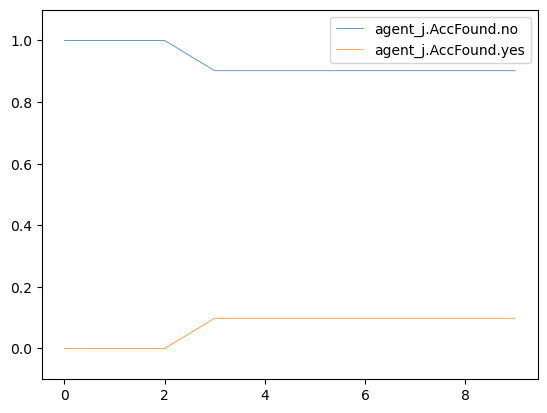

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,ManipulateData
2,0.0,1.0,DeployDataDecoys,EnumAccounts
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


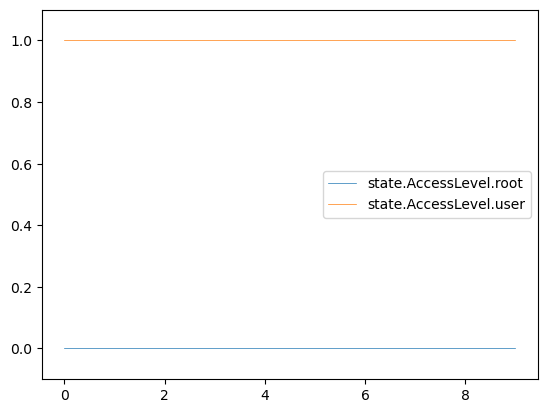

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,ManipulateData,file_write
2,0.000000,1.000000,DeployDataDecoys,EnumAccounts,file_enum
3,0.000943,0.999057,Nop,FileRecon,file_enum
4,0.085525,0.914475,Nop,FileRecon,file_enum
5,0.107575,0.892425,Nop,Exit,none
6,0.008535,0.991465,Nop,Nop,none
7,0.006679,0.993321,Nop,Nop,none
8,0.006675,0.993325,Nop,Nop,none
9,0.006675,0.993325,Nop,Nop,none


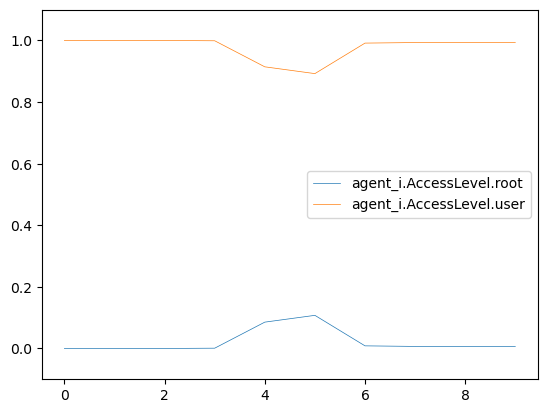

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,none,success,active
1,0.0,1.0,ManipulateData,Nop,user_files,failure,active
2,0.0,1.0,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.0,1.0,FileRecon,Nop,none,failure,active
4,0.0,1.0,FileRecon,Nop,user_files,failure,active
5,0.0,1.0,Exit,Nop,user_files,failure,inactive
6,0.0,1.0,Nop,Nop,user_files,failure,inactive
7,0.0,1.0,Nop,Nop,user_files,failure,inactive
8,0.0,1.0,Nop,Nop,none,success,inactive
9,0.0,1.0,Nop,Nop,none,failure,inactive


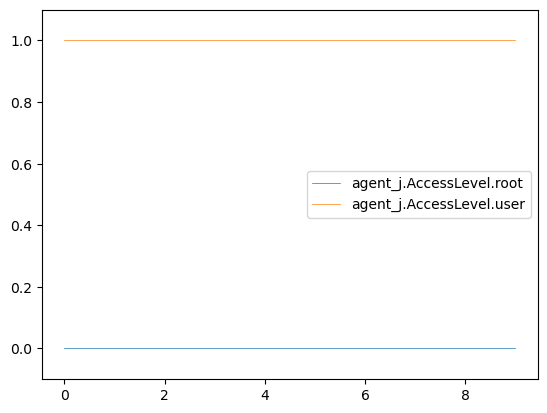

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,ManipulateData
2,0.0,1.0,DeployDataDecoys,EnumAccounts
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


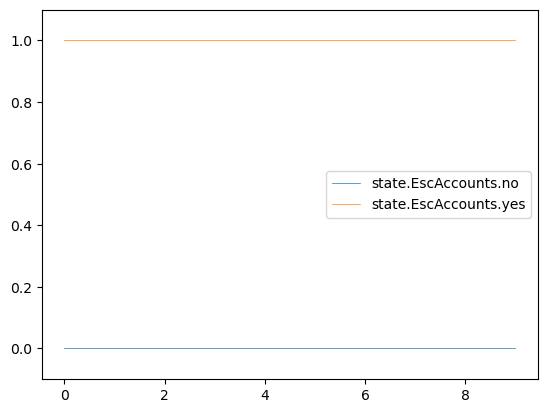

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,ManipulateData,file_write
2,0.0,1.0,DeployDataDecoys,EnumAccounts,file_enum
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,FileRecon,file_enum
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


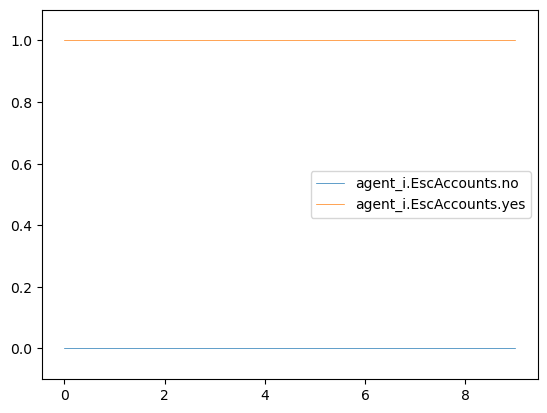

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,success,active
1,0.500000,0.500000,ManipulateData,Nop,user_files,failure,active
2,0.500000,0.500000,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.892857,0.107143,FileRecon,Nop,none,failure,active
4,0.892857,0.107143,FileRecon,Nop,user_files,failure,active
5,0.892857,0.107143,Exit,Nop,user_files,failure,inactive
6,0.892857,0.107143,Nop,Nop,user_files,failure,inactive
7,0.892857,0.107143,Nop,Nop,user_files,failure,inactive
8,0.892857,0.107143,Nop,Nop,none,success,inactive
9,0.892857,0.107143,Nop,Nop,none,failure,inactive


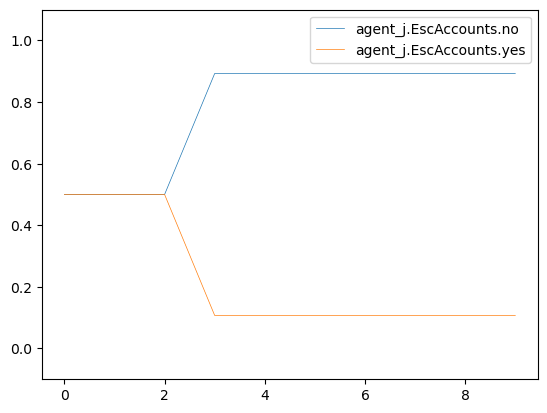

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,ManipulateData
2,0.0,1.0,DeployDataDecoys,EnumAccounts
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,FileRecon
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


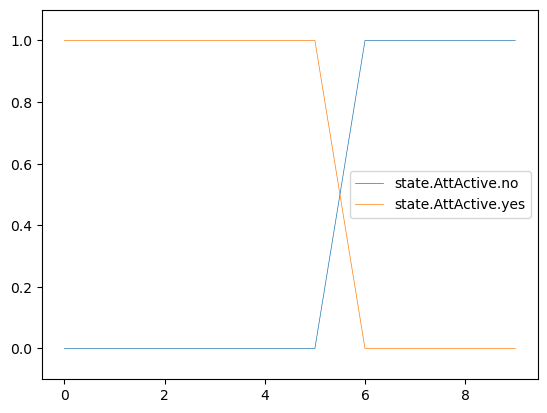

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.500000,5.000000e-01,Nop,FileRecon,file_enum
1,0.010204,9.897959e-01,Nop,ManipulateData,file_write
2,0.019080,9.809197e-01,DeployDataDecoys,EnumAccounts,file_enum
3,0.000229,9.997706e-01,Nop,FileRecon,file_enum
4,0.000026,9.999737e-01,Nop,FileRecon,file_enum
5,0.002291,9.977092e-01,Nop,Exit,none
6,0.938429,6.157096e-02,Nop,Nop,none
7,0.999381,6.185450e-04,Nop,Nop,none
8,0.999994,6.278838e-06,Nop,Nop,none
9,1.000000,6.506274e-08,Nop,Nop,none


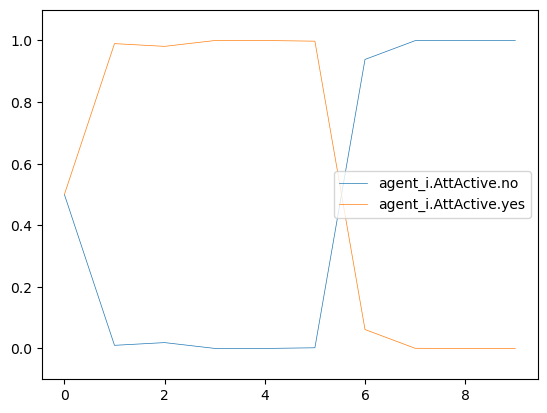

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,none,success,active
1,0.0,1.0,ManipulateData,Nop,user_files,failure,active
2,0.0,1.0,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.0,1.0,FileRecon,Nop,none,failure,active
4,0.0,1.0,FileRecon,Nop,user_files,failure,active
5,0.0,1.0,Exit,Nop,user_files,failure,inactive
6,1.0,0.0,Nop,Nop,user_files,failure,inactive
7,1.0,0.0,Nop,Nop,user_files,failure,inactive
8,1.0,0.0,Nop,Nop,none,success,inactive
9,1.0,0.0,Nop,Nop,none,failure,inactive


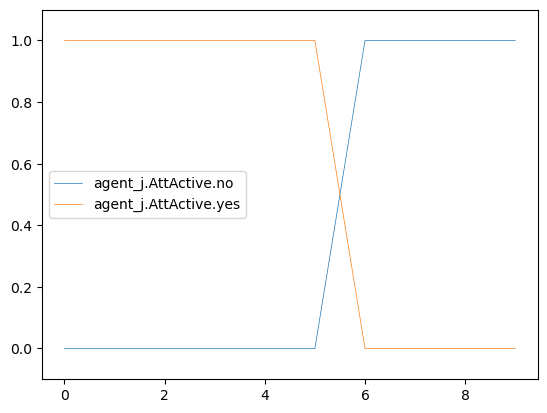

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,EnumAccounts
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


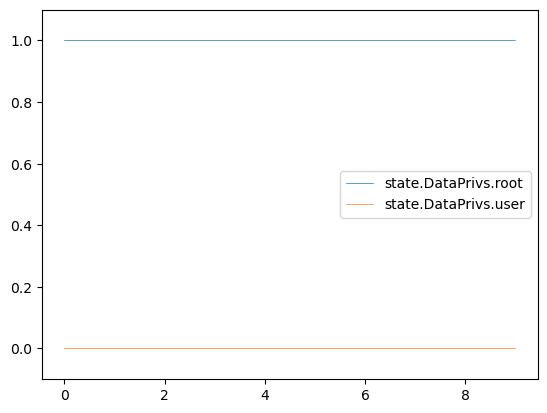

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,ManipulateData,file_write
2,1.0,0.0,DeployDataDecoys,EnumAccounts,file_enum
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,FileRecon,file_enum
5,1.0,0.0,Nop,Exit,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


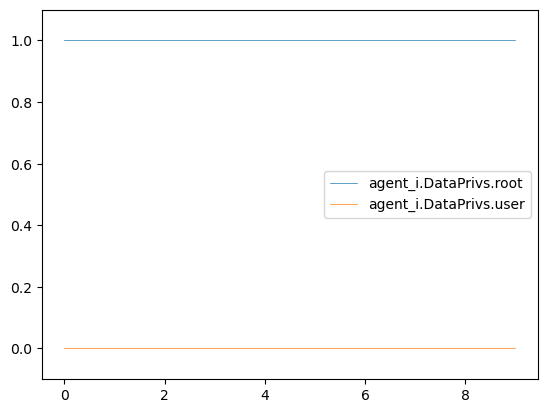

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,success,active
1,0.192308,0.807692,ManipulateData,Nop,user_files,failure,active
2,0.623596,0.376404,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.623596,0.376404,FileRecon,Nop,none,failure,active
4,0.736328,0.263672,FileRecon,Nop,user_files,failure,active
5,0.779716,0.220284,Exit,Nop,user_files,failure,inactive
6,0.779716,0.220284,Nop,Nop,user_files,failure,inactive
7,0.779716,0.220284,Nop,Nop,user_files,failure,inactive
8,0.779716,0.220284,Nop,Nop,none,success,inactive
9,0.779716,0.220284,Nop,Nop,none,failure,inactive


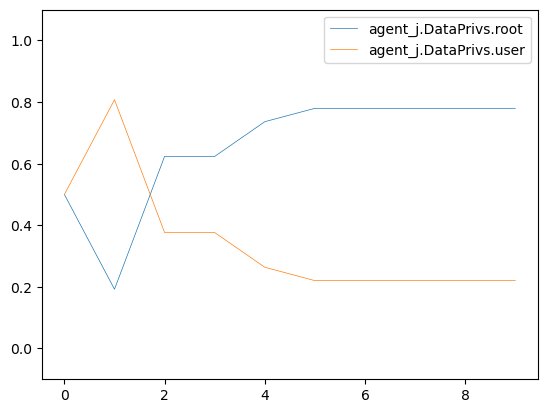

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,EnumAccounts
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,FileRecon
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


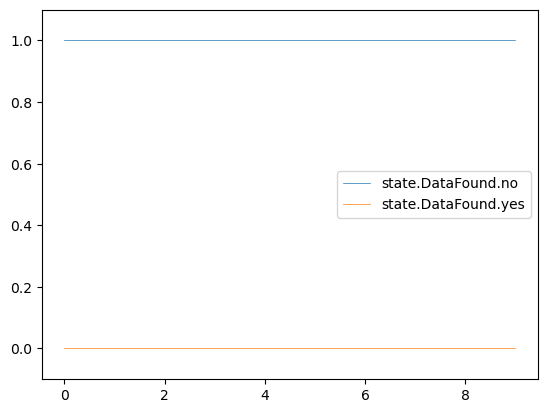

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,ManipulateData,file_write
2,1.000000,0.000000,DeployDataDecoys,EnumAccounts,file_enum
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,0.993623,0.006377,Nop,FileRecon,file_enum
5,0.913754,0.086246,Nop,Exit,none
6,0.992006,0.007994,Nop,Nop,none
7,0.993442,0.006558,Nop,Nop,none
8,0.993445,0.006555,Nop,Nop,none
9,0.993445,0.006555,Nop,Nop,none


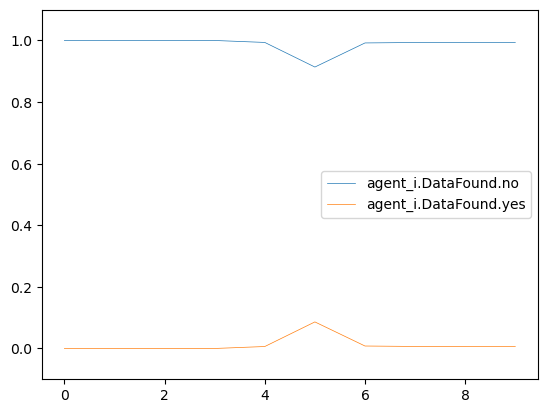

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,success,active
1,0.307692,0.692308,ManipulateData,Nop,user_files,failure,active
2,0.997753,0.002247,EnumAccounts,DeployDataDecoys,none,failure,active
3,0.997753,0.002247,FileRecon,Nop,none,failure,active
4,0.977403,0.022597,FileRecon,Nop,user_files,failure,active
5,0.992256,0.007744,Exit,Nop,user_files,failure,inactive
6,0.992256,0.007744,Nop,Nop,user_files,failure,inactive
7,0.992256,0.007744,Nop,Nop,user_files,failure,inactive
8,0.992256,0.007744,Nop,Nop,none,success,inactive
9,0.992256,0.007744,Nop,Nop,none,failure,inactive


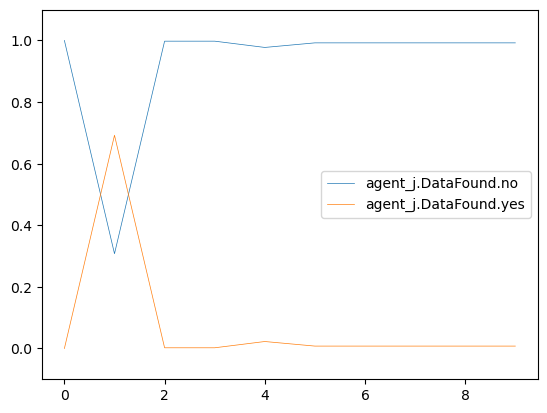

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_write
2,1.0,file_write
3,1.0,none
4,1.0,none
5,1.0,none
6,1.0,none
7,1.0,file_write
8,1.0,file_write
9,1.0,file_write


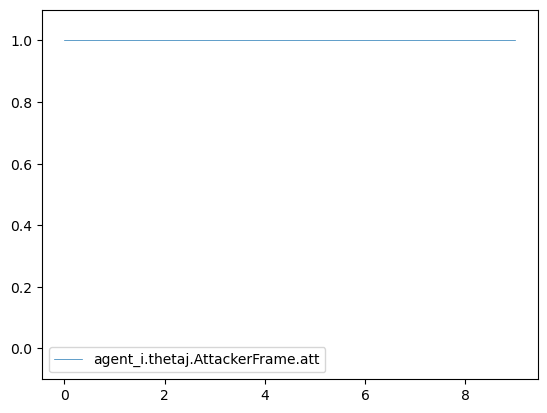

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,user_files,success,active
1,0.500000,0.500000,user_files,success,active
2,0.183007,0.816993,none,failure,inactive
3,0.183007,0.816994,user_files,failure,inactive
4,0.183007,0.816993,user_files,success,inactive
5,0.183007,0.816994,user_files,success,inactive
6,0.183007,0.816994,user_files,failure,inactive
7,0.183007,0.816994,none,success,inactive
8,0.183007,0.816994,user_files,success,inactive
9,0.183007,0.816994,none,success,inactive


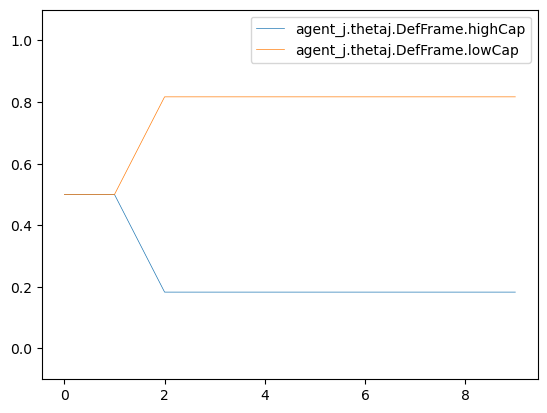

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,Exit
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


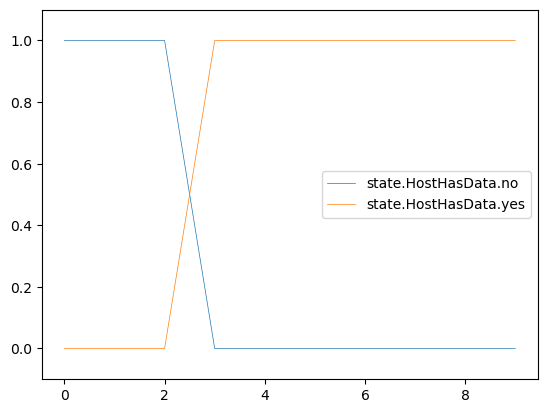

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,ManipulateData,file_write
2,1.0,0.0,DeployDataDecoys,Exit,file_write
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_write
8,0.0,1.0,Nop,Nop,file_write
9,0.0,1.0,Nop,Nop,file_write


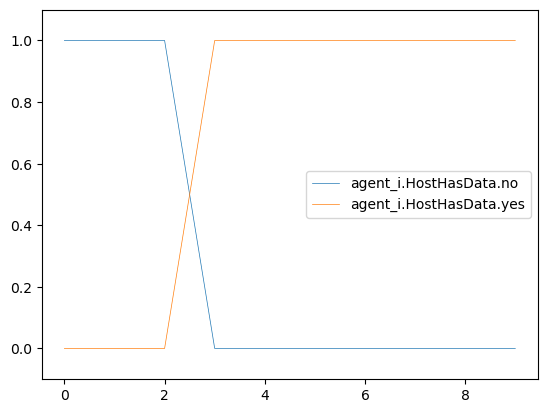

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,user_files,success,active
1,0.192308,0.807692,ManipulateData,Nop,user_files,success,active
2,0.000278,0.999722,Exit,DeployDataDecoys,none,failure,inactive
3,0.000234,0.999766,Nop,Nop,user_files,failure,inactive
4,0.000234,0.999766,Nop,Nop,user_files,success,inactive
5,0.000234,0.999766,Nop,Nop,user_files,success,inactive
6,0.000234,0.999766,Nop,Nop,user_files,failure,inactive
7,0.000234,0.999766,Nop,Nop,none,success,inactive
8,0.000234,0.999766,Nop,Nop,user_files,success,inactive
9,0.000234,0.999766,Nop,Nop,none,success,inactive


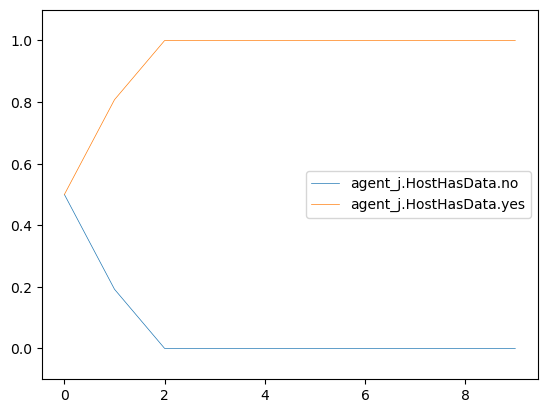

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,Exit
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


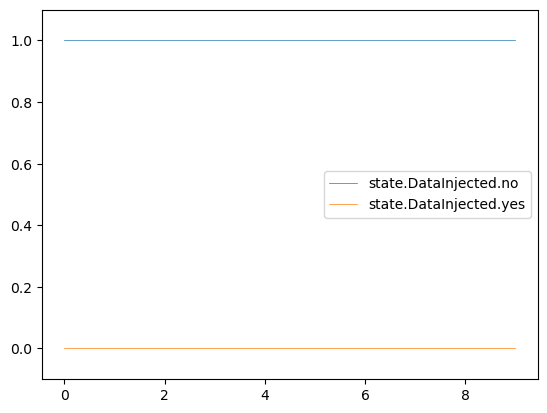

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,ManipulateData,file_write
2,1.000000,0.000000,DeployDataDecoys,Exit,file_write
3,1.000000,0.000000,Nop,Nop,none
4,1.000000,0.000000,Nop,Nop,none
5,0.999976,0.000024,Nop,Nop,none
6,0.999973,0.000027,Nop,Nop,none
7,0.999973,0.000027,Nop,Nop,file_write
8,0.999973,0.000027,Nop,Nop,file_write
9,0.999973,0.000027,Nop,Nop,file_write


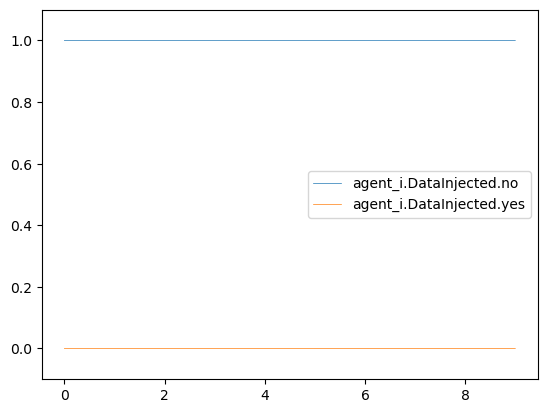

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,user_files,success,active
1,1.000000,0.000000,ManipulateData,Nop,user_files,success,active
2,0.000445,0.999555,Exit,DeployDataDecoys,none,failure,inactive
3,0.000445,0.999555,Nop,Nop,user_files,failure,inactive
4,0.000445,0.999555,Nop,Nop,user_files,success,inactive
5,0.000445,0.999555,Nop,Nop,user_files,success,inactive
6,0.000445,0.999555,Nop,Nop,user_files,failure,inactive
7,0.000445,0.999555,Nop,Nop,none,success,inactive
8,0.000445,0.999555,Nop,Nop,user_files,success,inactive
9,0.000445,0.999555,Nop,Nop,none,success,inactive


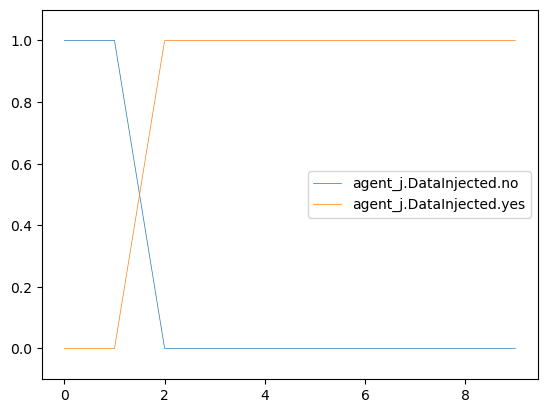

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,FileRecon
1,0.0,0.0,1.0,Nop,ManipulateData
2,0.0,0.0,1.0,DeployDataDecoys,Exit
3,0.0,0.0,1.0,Nop,Nop
4,0.0,0.0,1.0,Nop,Nop
5,0.0,0.0,1.0,Nop,Nop
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


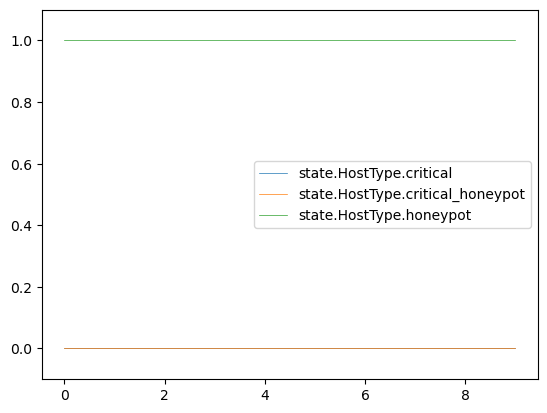

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,0.0,1.0,Nop,ManipulateData,file_write
2,0.0,0.0,1.0,DeployDataDecoys,Exit,file_write
3,0.0,0.0,1.0,Nop,Nop,none
4,0.0,0.0,1.0,Nop,Nop,none
5,0.0,0.0,1.0,Nop,Nop,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,file_write
8,0.0,0.0,1.0,Nop,Nop,file_write
9,0.0,0.0,1.0,Nop,Nop,file_write


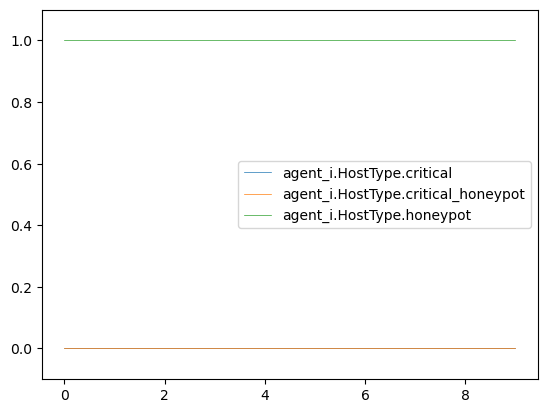

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.0,0.500000,FileRecon,Nop,user_files,success,active
1,0.800000,0.0,0.200000,ManipulateData,Nop,user_files,success,active
2,0.673203,0.0,0.326797,Exit,DeployDataDecoys,none,failure,inactive
3,0.673203,0.0,0.326797,Nop,Nop,user_files,failure,inactive
4,0.673203,0.0,0.326797,Nop,Nop,user_files,success,inactive
5,0.673203,0.0,0.326797,Nop,Nop,user_files,success,inactive
6,0.673203,0.0,0.326797,Nop,Nop,user_files,failure,inactive
7,0.673203,0.0,0.326797,Nop,Nop,none,success,inactive
8,0.673203,0.0,0.326797,Nop,Nop,user_files,success,inactive
9,0.673203,0.0,0.326797,Nop,Nop,none,success,inactive


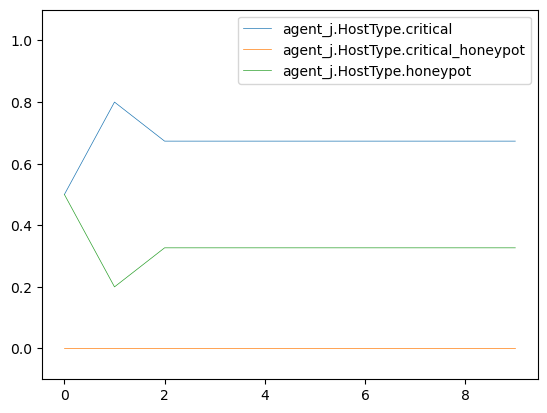

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,Exit
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


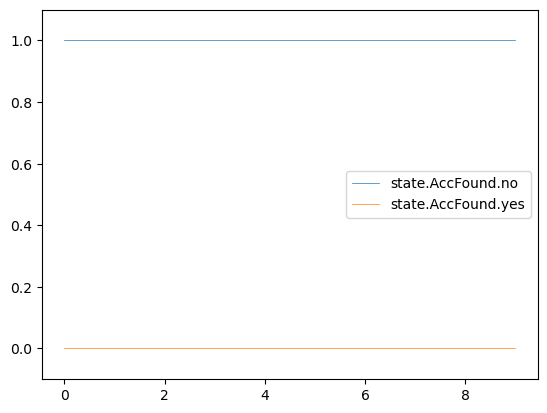

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,ManipulateData,file_write
2,0.917547,0.082453,DeployDataDecoys,Exit,file_write
3,0.296727,0.703273,Nop,Nop,none
4,0.969680,0.030320,Nop,Nop,none
5,0.998946,0.001054,Nop,Nop,none
6,0.999301,0.000699,Nop,Nop,none
7,0.999302,0.000698,Nop,Nop,file_write
8,0.999302,0.000698,Nop,Nop,file_write
9,0.999302,0.000698,Nop,Nop,file_write


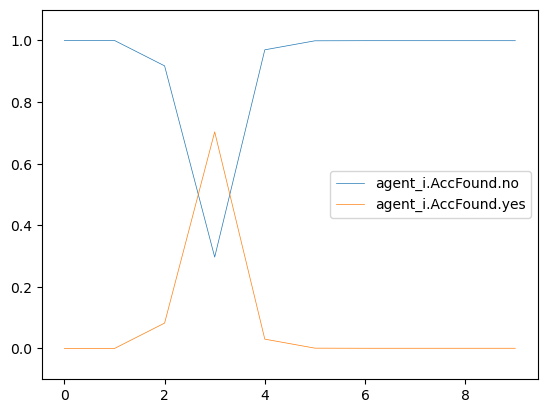

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.0,0.0,FileRecon,Nop,user_files,success,active
1,1.0,0.0,ManipulateData,Nop,user_files,success,active
2,1.0,0.0,Exit,DeployDataDecoys,none,failure,inactive
3,1.0,0.0,Nop,Nop,user_files,failure,inactive
4,1.0,0.0,Nop,Nop,user_files,success,inactive
5,1.0,0.0,Nop,Nop,user_files,success,inactive
6,1.0,0.0,Nop,Nop,user_files,failure,inactive
7,1.0,0.0,Nop,Nop,none,success,inactive
8,1.0,0.0,Nop,Nop,user_files,success,inactive
9,1.0,0.0,Nop,Nop,none,success,inactive


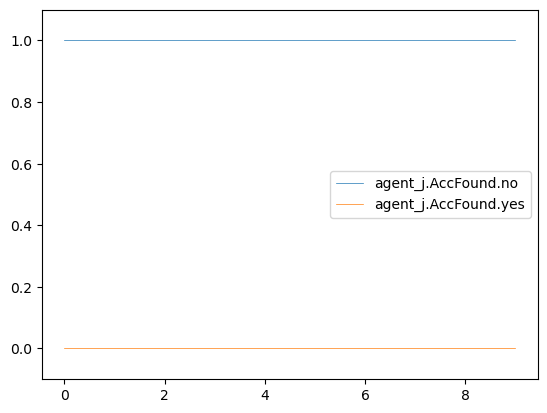

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,ManipulateData
2,0.0,1.0,DeployDataDecoys,Exit
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


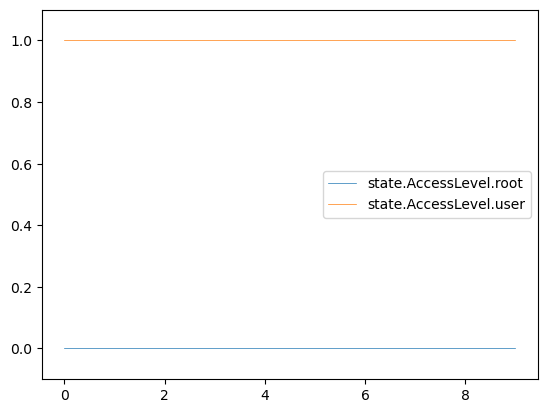

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,ManipulateData,file_write
2,0.000000,1.000000,DeployDataDecoys,Exit,file_write
3,0.059527,0.940473,Nop,Nop,none
4,0.027406,0.972594,Nop,Nop,none
5,0.000362,0.999638,Nop,Nop,none
6,0.000029,0.999971,Nop,Nop,none
7,0.000028,0.999972,Nop,Nop,file_write
8,0.000028,0.999972,Nop,Nop,file_write
9,0.000028,0.999972,Nop,Nop,file_write


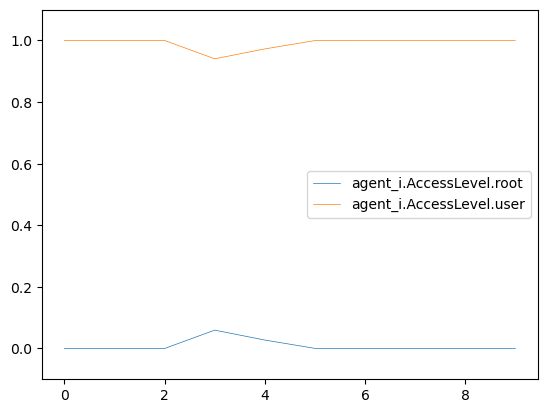

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,user_files,success,active
1,0.0,1.0,ManipulateData,Nop,user_files,success,active
2,0.0,1.0,Exit,DeployDataDecoys,none,failure,inactive
3,0.0,1.0,Nop,Nop,user_files,failure,inactive
4,0.0,1.0,Nop,Nop,user_files,success,inactive
5,0.0,1.0,Nop,Nop,user_files,success,inactive
6,0.0,1.0,Nop,Nop,user_files,failure,inactive
7,0.0,1.0,Nop,Nop,none,success,inactive
8,0.0,1.0,Nop,Nop,user_files,success,inactive
9,0.0,1.0,Nop,Nop,none,success,inactive


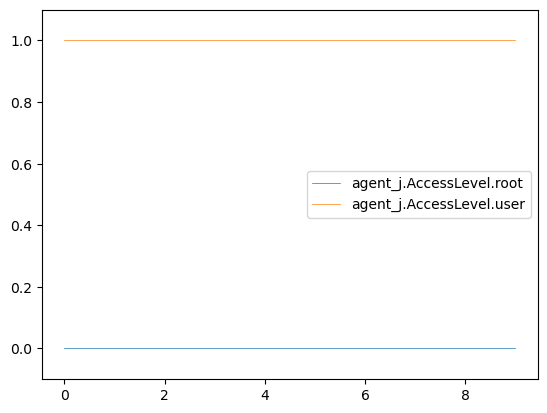

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,ManipulateData
2,0.0,1.0,DeployDataDecoys,Exit
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


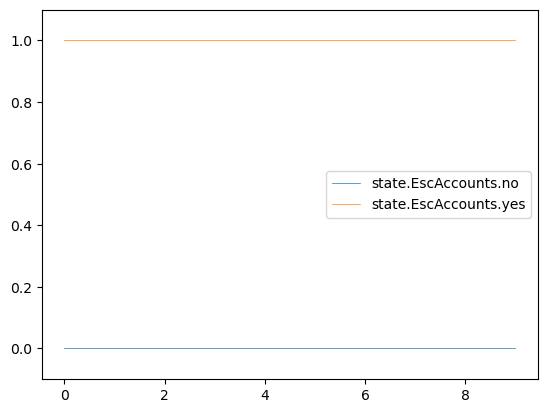

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,ManipulateData,file_write
2,0.0,1.0,DeployDataDecoys,Exit,file_write
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_write
8,0.0,1.0,Nop,Nop,file_write
9,0.0,1.0,Nop,Nop,file_write


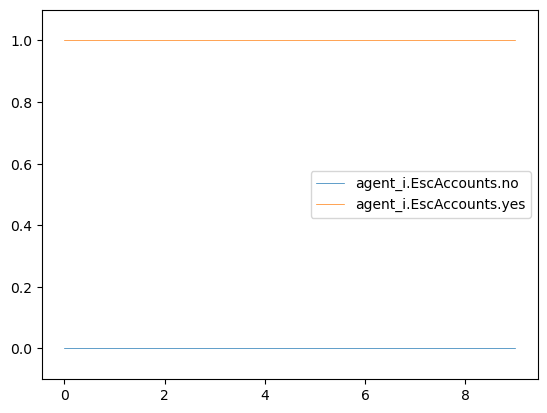

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.5,0.5,FileRecon,Nop,user_files,success,active
1,0.5,0.5,ManipulateData,Nop,user_files,success,active
2,0.5,0.5,Exit,DeployDataDecoys,none,failure,inactive
3,0.5,0.5,Nop,Nop,user_files,failure,inactive
4,0.5,0.5,Nop,Nop,user_files,success,inactive
5,0.5,0.5,Nop,Nop,user_files,success,inactive
6,0.5,0.5,Nop,Nop,user_files,failure,inactive
7,0.5,0.5,Nop,Nop,none,success,inactive
8,0.5,0.5,Nop,Nop,user_files,success,inactive
9,0.5,0.5,Nop,Nop,none,success,inactive


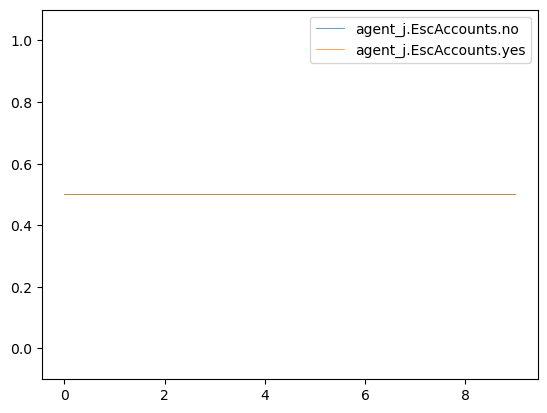

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,ManipulateData
2,0.0,1.0,DeployDataDecoys,Exit
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


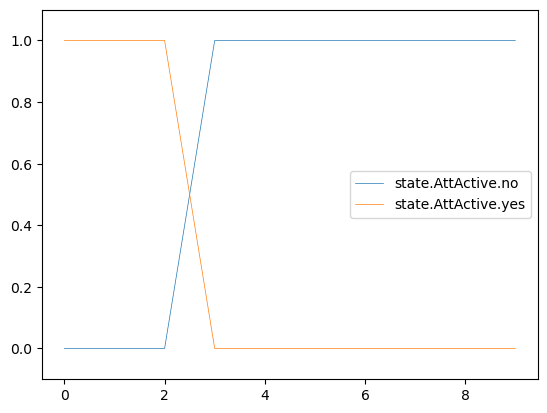

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.500000,5.000000e-01,Nop,FileRecon,file_enum
1,0.010204,9.897959e-01,Nop,ManipulateData,file_write
2,0.019080,9.809197e-01,DeployDataDecoys,Exit,file_write
3,0.289624,7.103764e-01,Nop,Nop,none
4,0.969520,3.048020e-02,Nop,Nop,none
5,0.999605,3.954234e-04,Nop,Nop,none
6,0.999995,4.647791e-06,Nop,Nop,none
7,1.000000,1.875436e-08,Nop,Nop,file_write
8,1.000000,1.706054e-08,Nop,Nop,file_write
9,1.000000,2.989864e-10,Nop,Nop,file_write


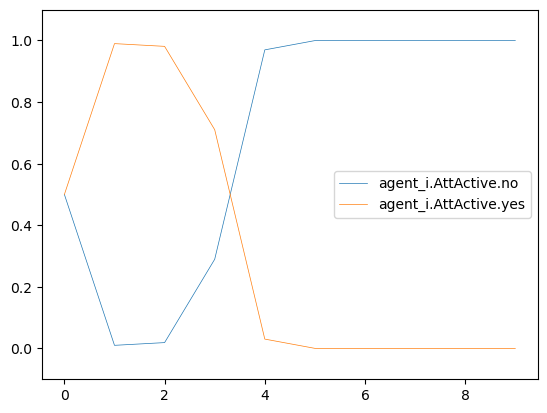

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,user_files,success,active
1,0.0,1.0,ManipulateData,Nop,user_files,success,active
2,0.0,1.0,Exit,DeployDataDecoys,none,failure,inactive
3,1.0,0.0,Nop,Nop,user_files,failure,inactive
4,1.0,0.0,Nop,Nop,user_files,success,inactive
5,1.0,0.0,Nop,Nop,user_files,success,inactive
6,1.0,0.0,Nop,Nop,user_files,failure,inactive
7,1.0,0.0,Nop,Nop,none,success,inactive
8,1.0,0.0,Nop,Nop,user_files,success,inactive
9,1.0,0.0,Nop,Nop,none,success,inactive


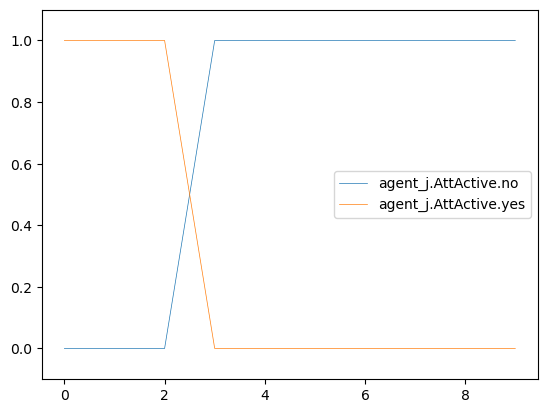

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,Exit
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


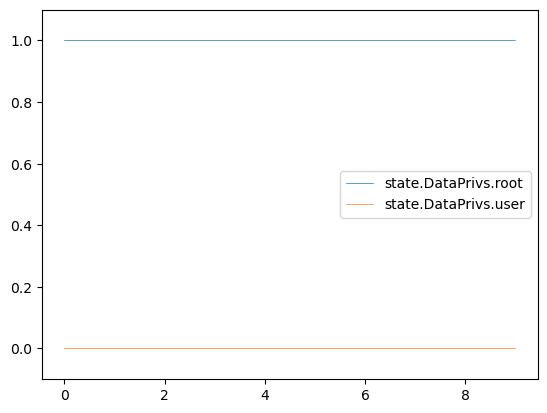

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,ManipulateData,file_write
2,1.0,0.0,DeployDataDecoys,Exit,file_write
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,file_write
8,1.0,0.0,Nop,Nop,file_write
9,1.0,0.0,Nop,Nop,file_write


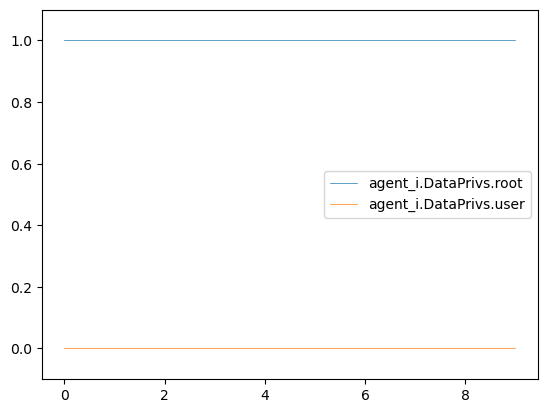

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,user_files,success,active
1,0.192308,0.807692,ManipulateData,Nop,user_files,success,active
2,0.000278,0.999722,Exit,DeployDataDecoys,none,failure,inactive
3,0.000278,0.999722,Nop,Nop,user_files,failure,inactive
4,0.000278,0.999722,Nop,Nop,user_files,success,inactive
5,0.000278,0.999722,Nop,Nop,user_files,success,inactive
6,0.000278,0.999722,Nop,Nop,user_files,failure,inactive
7,0.000278,0.999722,Nop,Nop,none,success,inactive
8,0.000278,0.999722,Nop,Nop,user_files,success,inactive
9,0.000278,0.999722,Nop,Nop,none,success,inactive


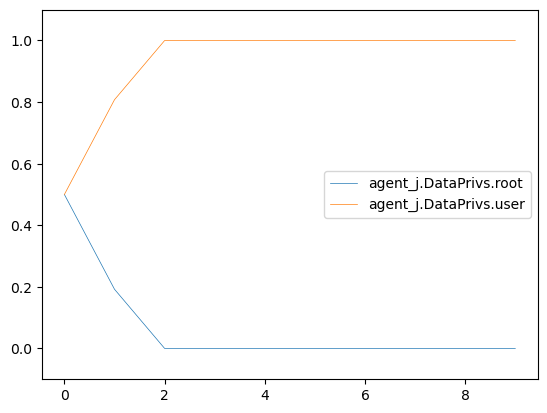

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,ManipulateData
2,1.0,0.0,DeployDataDecoys,Exit
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


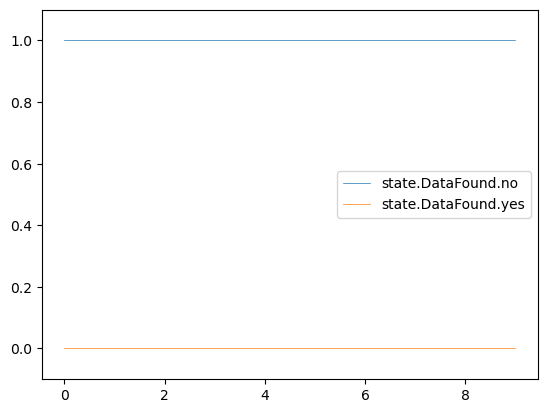

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,ManipulateData,file_write
2,1.000000,0.000000,DeployDataDecoys,Exit,file_write
3,1.000000,0.000000,Nop,Nop,none
4,0.997957,0.002043,Nop,Nop,none
5,0.999705,0.000295,Nop,Nop,none
6,0.999972,0.000028,Nop,Nop,none
7,0.999973,0.000027,Nop,Nop,file_write
8,0.999973,0.000028,Nop,Nop,file_write
9,0.999973,0.000028,Nop,Nop,file_write


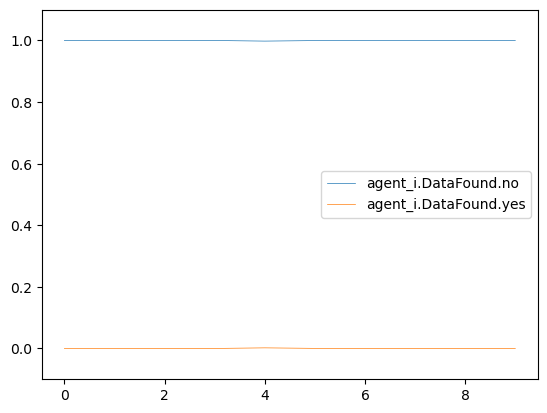

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,user_files,success,active
1,0.307692,0.692308,ManipulateData,Nop,user_files,success,active
2,0.000445,0.999555,Exit,DeployDataDecoys,none,failure,inactive
3,0.000445,0.999555,Nop,Nop,user_files,failure,inactive
4,0.000445,0.999555,Nop,Nop,user_files,success,inactive
5,0.000445,0.999555,Nop,Nop,user_files,success,inactive
6,0.000445,0.999555,Nop,Nop,user_files,failure,inactive
7,0.000445,0.999555,Nop,Nop,none,success,inactive
8,0.000445,0.999555,Nop,Nop,user_files,success,inactive
9,0.000445,0.999555,Nop,Nop,none,success,inactive


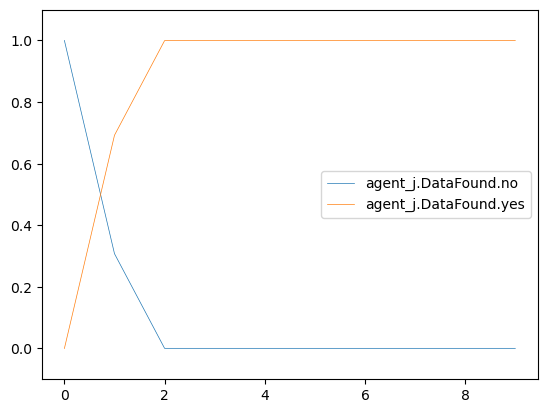

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_enum
2,1.0,su_login
3,1.0,file_enum
4,1.0,file_write
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


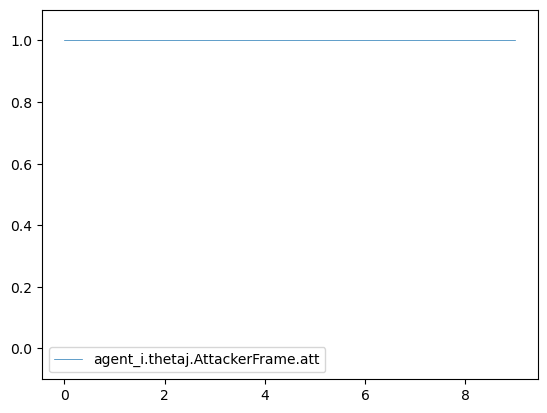

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,user_files,failure,active
1,0.500000,0.500000,none,success,active
2,0.339934,0.660066,none,success,active
3,0.335681,0.664319,none,success,active
4,0.626346,0.373654,user_files,success,active
5,0.668789,0.331211,user_files,success,inactive
6,0.668789,0.331211,none,success,inactive
7,0.668789,0.331211,user_files,success,inactive
8,0.668789,0.331211,user_files,success,inactive
9,0.668789,0.331211,none,success,inactive


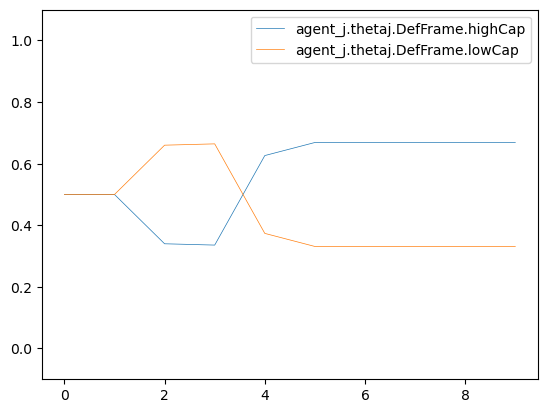

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


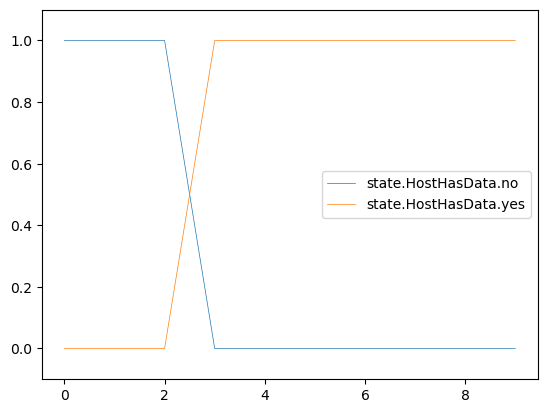

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


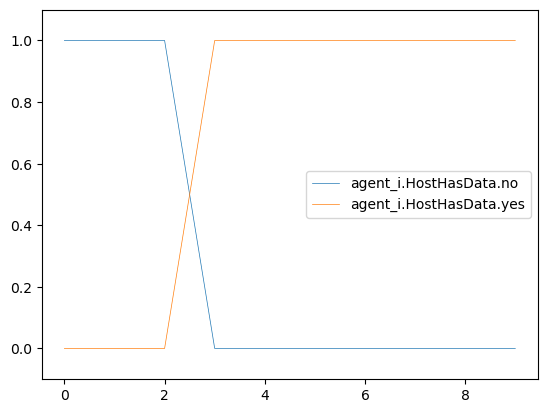

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,user_files,failure,active
1,0.608108,0.391892,EnumAccounts,Nop,none,success,active
2,0.608108,0.391892,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.406240,0.593760,FileRecon,Nop,none,success,active
4,0.063992,0.936008,ManipulateData,Nop,user_files,success,active
5,0.000070,0.999930,Exit,Nop,user_files,success,inactive
6,0.000070,0.999930,Nop,Nop,none,success,inactive
7,0.000070,0.999930,Nop,Nop,user_files,success,inactive
8,0.000070,0.999930,Nop,Nop,user_files,success,inactive
9,0.000070,0.999930,Nop,Nop,none,success,inactive


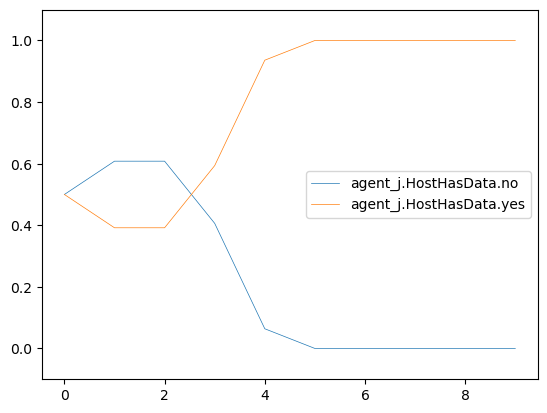

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


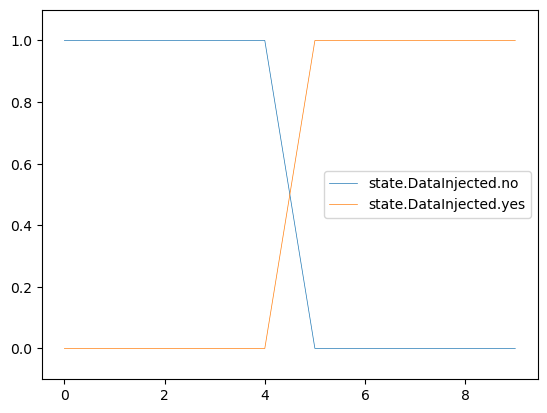

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,1.000000,0.000000,Nop,ManipulateData,file_write
5,0.032399,0.967601,Nop,Exit,none
6,0.002346,0.997653,Nop,Nop,none
7,0.001987,0.998013,Nop,Nop,none
8,0.001985,0.998015,Nop,Nop,none
9,0.001985,0.998015,Nop,Nop,none


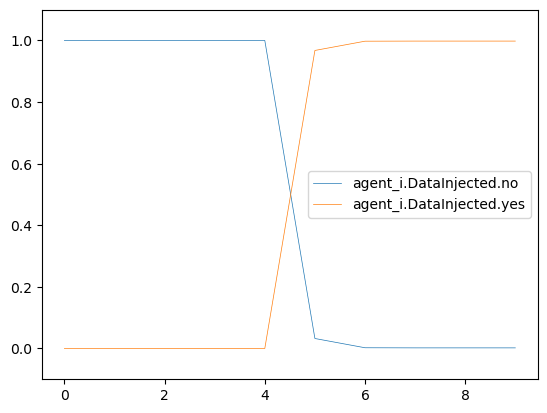

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,user_files,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,1.000000,0.000000,ManipulateData,Nop,user_files,success,active
5,0.000097,0.999903,Exit,Nop,user_files,success,inactive
6,0.000097,0.999903,Nop,Nop,none,success,inactive
7,0.000097,0.999903,Nop,Nop,user_files,success,inactive
8,0.000097,0.999903,Nop,Nop,user_files,success,inactive
9,0.000097,0.999903,Nop,Nop,none,success,inactive


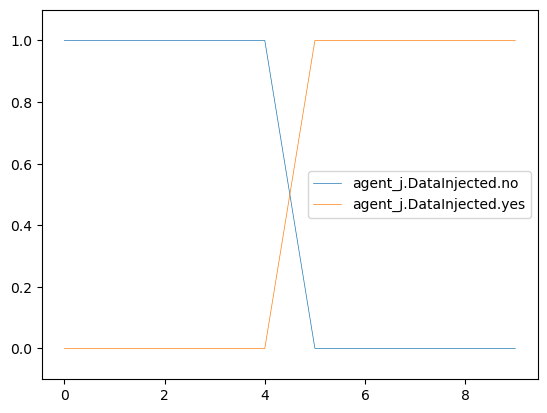

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,FileRecon
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,ManipulateData
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


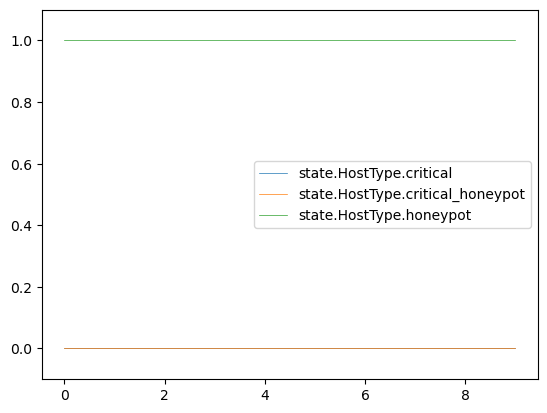

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,0.0,1.0,Nop,Exit,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,none


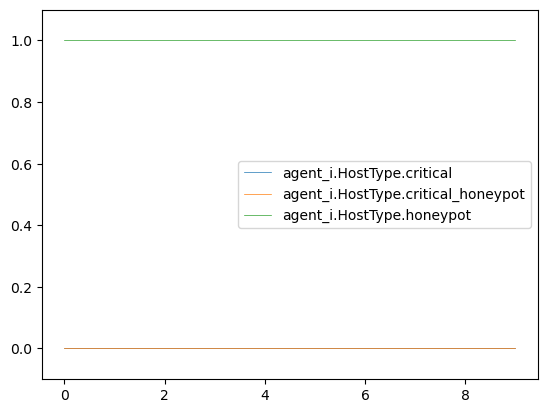

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.0,0.500000,FileRecon,Nop,user_files,failure,active
1,0.800000,0.0,0.200000,EnumAccounts,Nop,none,success,active
2,0.339934,0.0,0.660066,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.335681,0.0,0.664319,FileRecon,Nop,none,success,active
4,0.074761,0.0,0.925238,ManipulateData,Nop,user_files,success,active
5,0.066244,0.0,0.933756,Exit,Nop,user_files,success,inactive
6,0.066244,0.0,0.933756,Nop,Nop,none,success,inactive
7,0.066244,0.0,0.933756,Nop,Nop,user_files,success,inactive
8,0.066244,0.0,0.933757,Nop,Nop,user_files,success,inactive
9,0.066244,0.0,0.933756,Nop,Nop,none,success,inactive


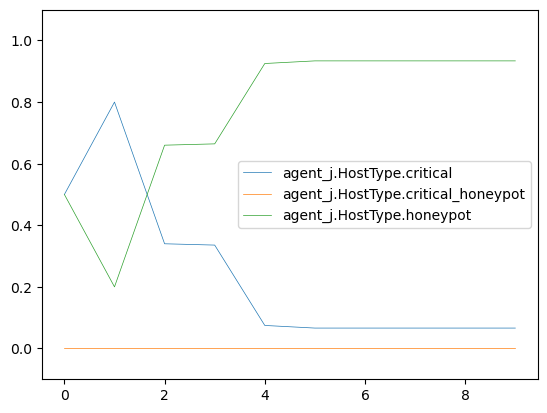

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


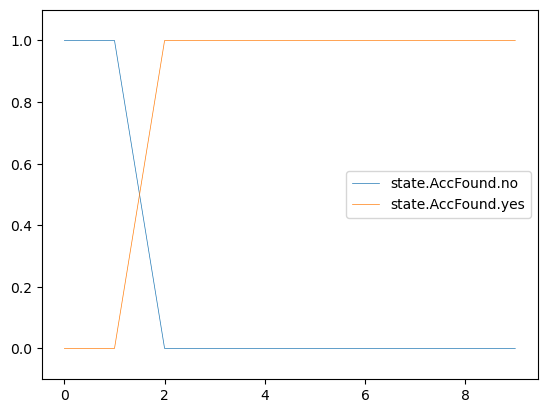

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,0.011249,0.988751,DeployDataDecoys,PrivEscAcc,su_login
3,0.009686,0.990314,Nop,FileRecon,file_enum
4,0.009684,0.990316,Nop,ManipulateData,file_write
5,0.001899,0.998101,Nop,Exit,none
6,0.001877,0.998123,Nop,Nop,none
7,0.001877,0.998123,Nop,Nop,none
8,0.001877,0.998123,Nop,Nop,none
9,0.001877,0.998123,Nop,Nop,none


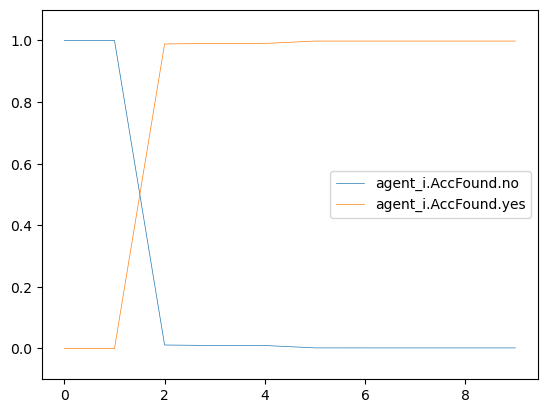

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,user_files,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,0.101815,0.898185,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.000113,0.999887,FileRecon,Nop,none,success,active
4,0.000053,0.999947,ManipulateData,Nop,user_files,success,active
5,0.000039,0.999961,Exit,Nop,user_files,success,inactive
6,0.000039,0.999961,Nop,Nop,none,success,inactive
7,0.000039,0.999961,Nop,Nop,user_files,success,inactive
8,0.000039,0.999961,Nop,Nop,user_files,success,inactive
9,0.000039,0.999961,Nop,Nop,none,success,inactive


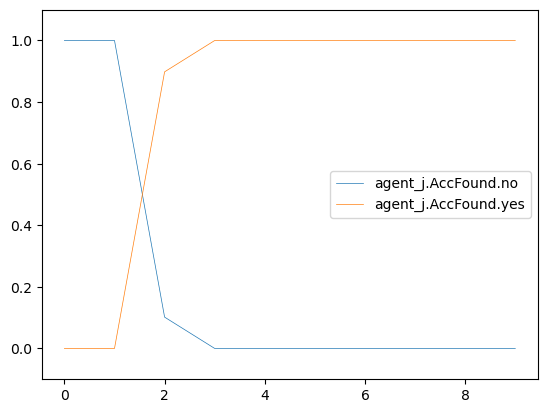

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


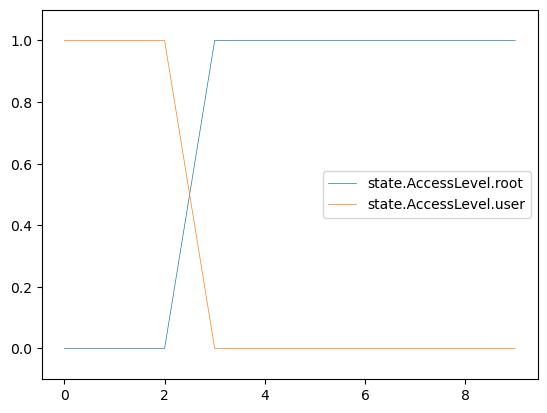

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,EnumAccounts,file_enum
2,0.000000,1.000000,DeployDataDecoys,PrivEscAcc,su_login
3,0.990261,0.009739,Nop,FileRecon,file_enum
4,0.990285,0.009715,Nop,ManipulateData,file_write
5,0.998095,0.001905,Nop,Exit,none
6,0.998120,0.001879,Nop,Nop,none
7,0.998121,0.001879,Nop,Nop,none
8,0.998121,0.001879,Nop,Nop,none
9,0.998121,0.001879,Nop,Nop,none


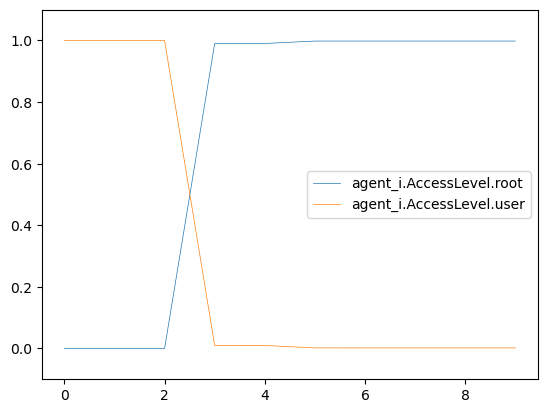

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,FileRecon,Nop,user_files,failure,active
1,0.000000,1.000000,EnumAccounts,Nop,none,success,active
2,0.000000,1.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.999887,0.000113,FileRecon,Nop,none,success,active
4,0.999947,0.000053,ManipulateData,Nop,user_files,success,active
5,0.999961,0.000039,Exit,Nop,user_files,success,inactive
6,0.999961,0.000039,Nop,Nop,none,success,inactive
7,0.999961,0.000039,Nop,Nop,user_files,success,inactive
8,0.999961,0.000039,Nop,Nop,user_files,success,inactive
9,0.999961,0.000039,Nop,Nop,none,success,inactive


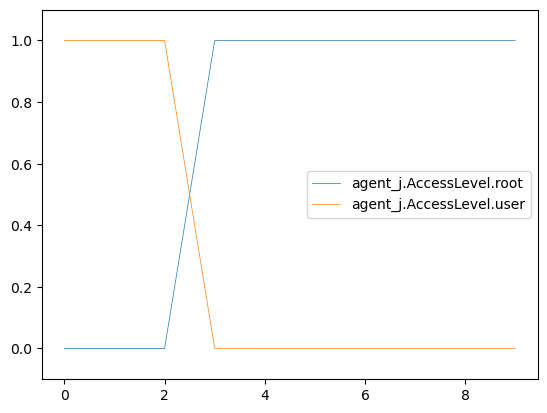

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


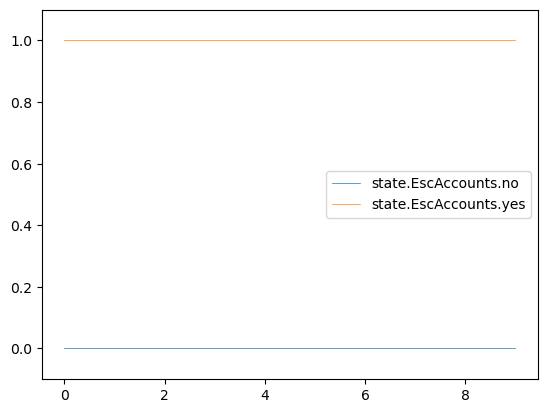

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


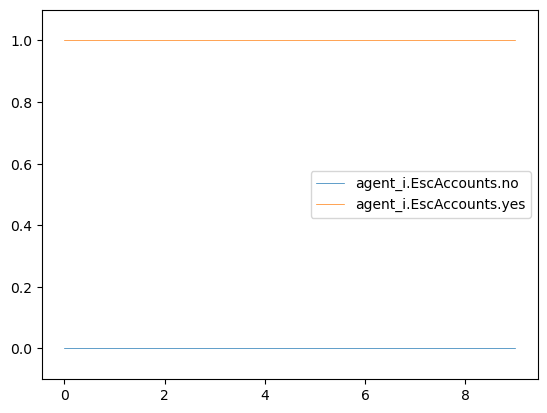

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,user_files,failure,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.100806,0.899194,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.000112,0.999888,FileRecon,Nop,none,success,active
4,0.000053,0.999947,ManipulateData,Nop,user_files,success,active
5,0.000039,0.999961,Exit,Nop,user_files,success,inactive
6,0.000039,0.999961,Nop,Nop,none,success,inactive
7,0.000039,0.999961,Nop,Nop,user_files,success,inactive
8,0.000039,0.999961,Nop,Nop,user_files,success,inactive
9,0.000039,0.999961,Nop,Nop,none,success,inactive


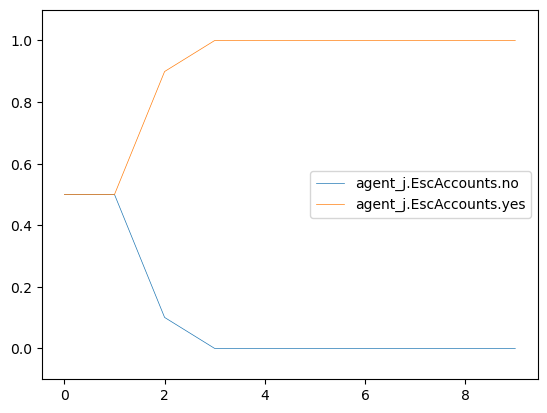

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


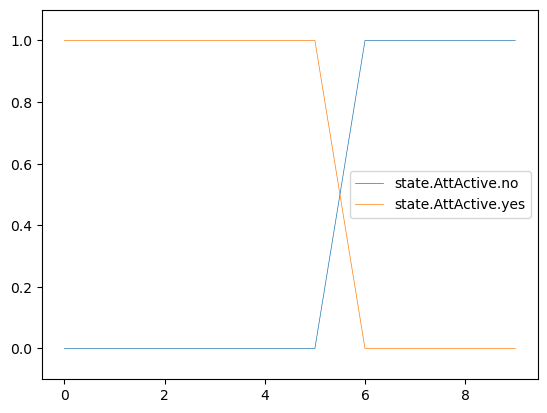

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,5.000000e-01,5.000000e-01,Nop,FileRecon,file_enum
1,1.020408e-02,9.897959e-01,Nop,EnumAccounts,file_enum
2,1.179412e-04,9.998821e-01,DeployDataDecoys,PrivEscAcc,su_login
3,1.234496e-06,9.999988e-01,Nop,FileRecon,file_enum
4,9.572710e-08,9.999998e-01,Nop,ManipulateData,file_write
5,5.032518e-04,9.994968e-01,Nop,Exit,none
6,9.995838e-01,4.160812e-04,Nop,Nop,none
7,9.999952e-01,4.804316e-06,Nop,Nop,none
8,1.000000e+00,1.556506e-08,Nop,Nop,none
9,1.000000e+00,4.660682e-11,Nop,Nop,none


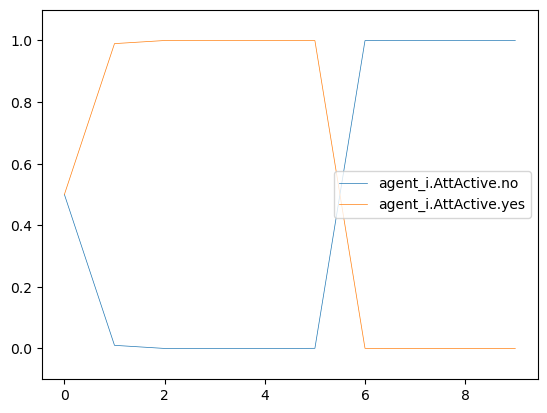

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,user_files,failure,active
1,0.0,1.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.0,1.0,FileRecon,Nop,none,success,active
4,0.0,1.0,ManipulateData,Nop,user_files,success,active
5,0.0,1.0,Exit,Nop,user_files,success,inactive
6,1.0,0.0,Nop,Nop,none,success,inactive
7,1.0,0.0,Nop,Nop,user_files,success,inactive
8,1.0,0.0,Nop,Nop,user_files,success,inactive
9,1.0,0.0,Nop,Nop,none,success,inactive


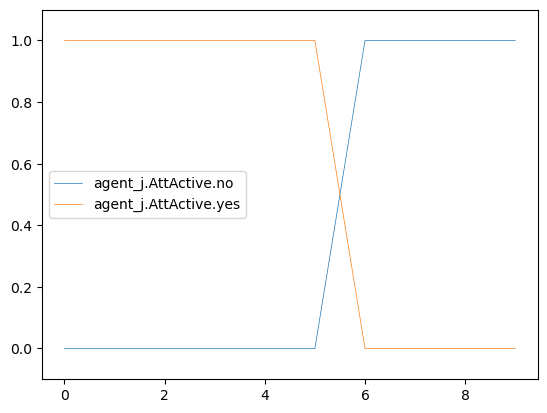

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


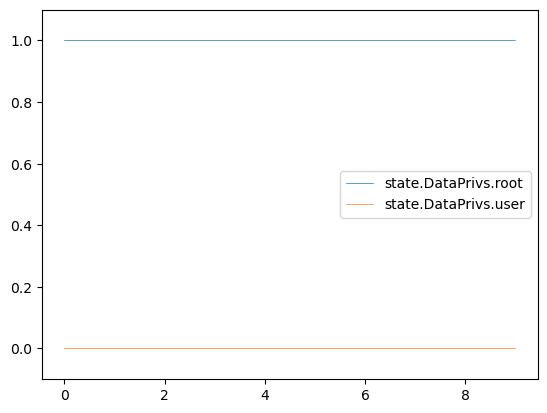

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,Nop,Exit,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


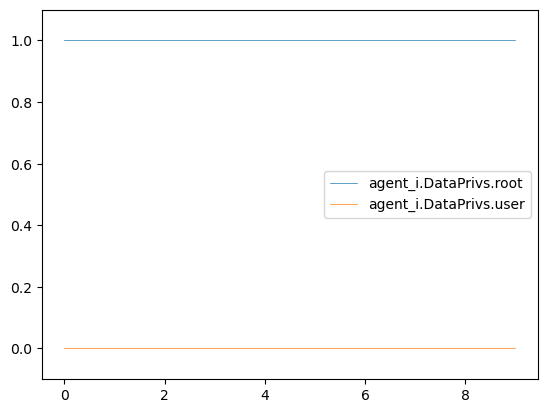

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,user_files,failure,active
1,0.608108,0.391892,EnumAccounts,Nop,none,success,active
2,0.608108,0.391892,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.608108,0.391892,FileRecon,Nop,none,success,active
4,0.647400,0.352600,ManipulateData,Nop,user_files,success,active
5,0.656568,0.343432,Exit,Nop,user_files,success,inactive
6,0.656568,0.343432,Nop,Nop,none,success,inactive
7,0.656568,0.343432,Nop,Nop,user_files,success,inactive
8,0.656568,0.343432,Nop,Nop,user_files,success,inactive
9,0.656568,0.343432,Nop,Nop,none,success,inactive


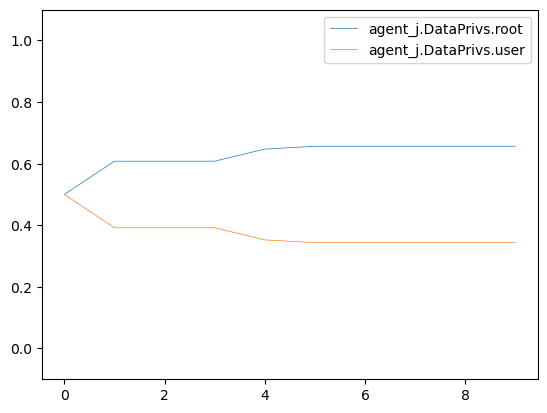

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


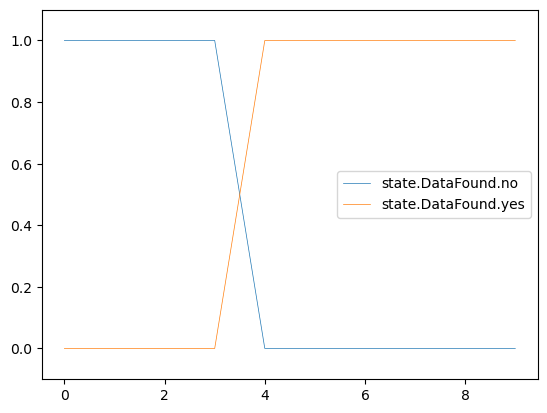

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,0.207772,0.792228,Nop,ManipulateData,file_write
5,0.029292,0.970708,Nop,Exit,none
6,0.002037,0.997963,Nop,Nop,none
7,0.001967,0.998033,Nop,Nop,none
8,0.001967,0.998033,Nop,Nop,none
9,0.001967,0.998033,Nop,Nop,none


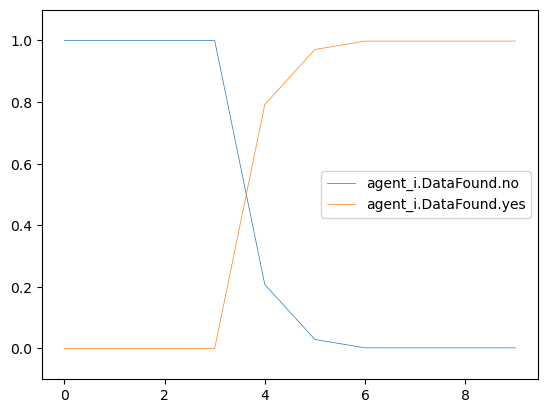

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,user_files,failure,active
1,0.972973,0.027027,EnumAccounts,Nop,none,success,active
2,0.972973,0.027027,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.972973,0.027027,FileRecon,Nop,none,success,active
4,0.088082,0.911917,ManipulateData,Nop,user_files,success,active
5,0.000097,0.999903,Exit,Nop,user_files,success,inactive
6,0.000097,0.999903,Nop,Nop,none,success,inactive
7,0.000097,0.999903,Nop,Nop,user_files,success,inactive
8,0.000097,0.999903,Nop,Nop,user_files,success,inactive
9,0.000097,0.999903,Nop,Nop,none,success,inactive


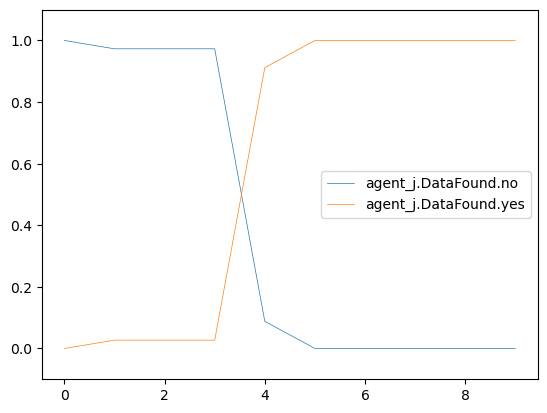

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.AttackerFrame.att,agent_i.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_enum
2,1.0,su_login
3,1.0,file_enum
4,1.0,file_write
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


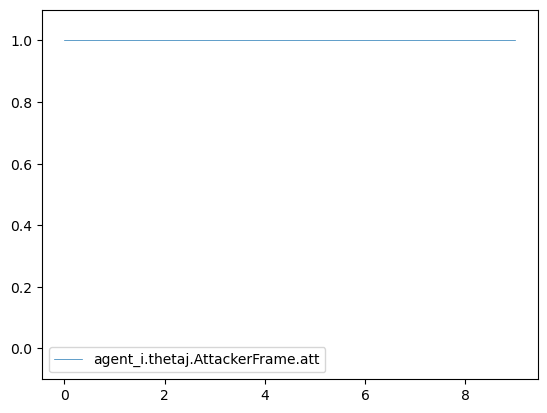

,agent_j.thetaj.DefFrame.highCap,agent_j.thetaj.DefFrame.lowCap,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,none,failure,active
1,0.500000,0.500000,none,success,active
2,0.485316,0.514684,none,success,active
3,0.485014,0.514986,none,success,active
4,0.673524,0.326476,user_files,success,active
5,0.713072,0.286928,user_files,failure,inactive
6,0.713072,0.286928,user_files,success,inactive
7,0.713072,0.286928,user_files,failure,inactive
8,0.713072,0.286928,user_files,success,inactive
9,0.713072,0.286928,none,success,inactive


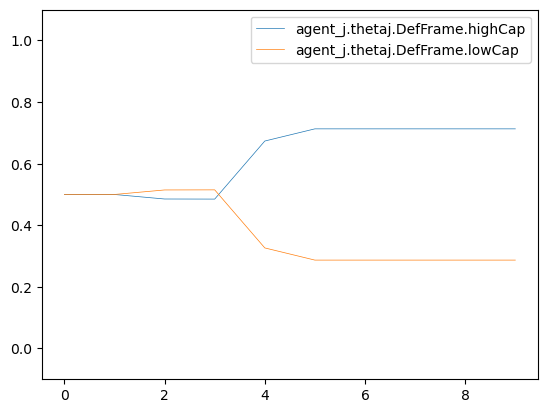

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


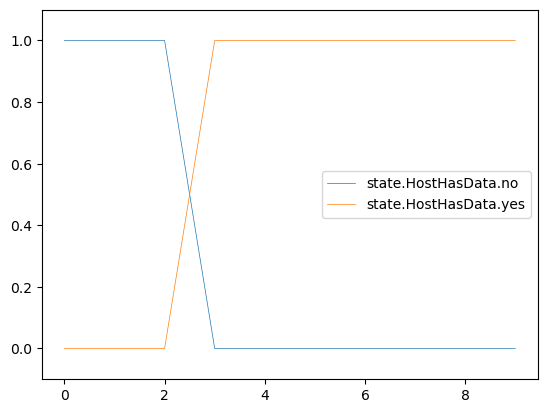

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


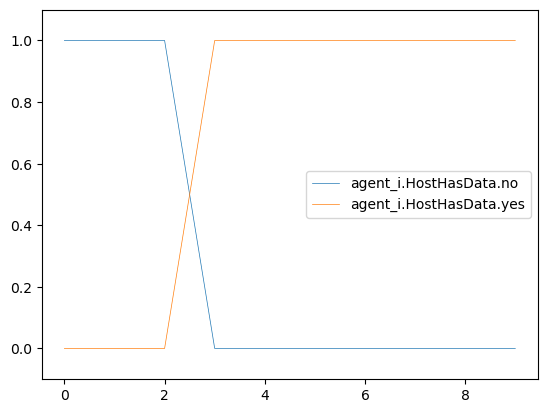

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,failure,active
1,0.608108,0.391892,EnumAccounts,Nop,none,success,active
2,0.608108,0.391892,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.313539,0.686461,FileRecon,Nop,none,success,active
4,0.055908,0.944092,ManipulateData,Nop,user_files,success,active
5,0.000061,0.999939,Exit,Nop,user_files,failure,inactive
6,0.000061,0.999939,Nop,Nop,user_files,success,inactive
7,0.000061,0.999939,Nop,Nop,user_files,failure,inactive
8,0.000061,0.999939,Nop,Nop,user_files,success,inactive
9,0.000061,0.999939,Nop,Nop,none,success,inactive


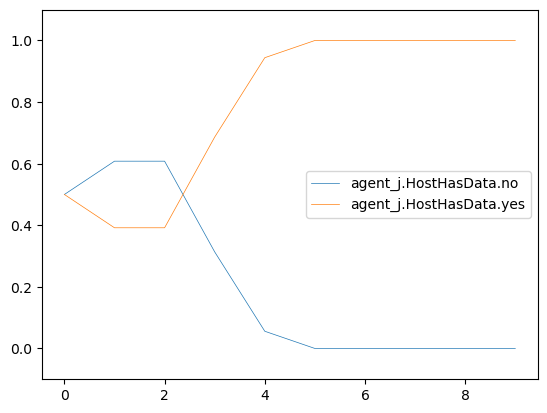

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


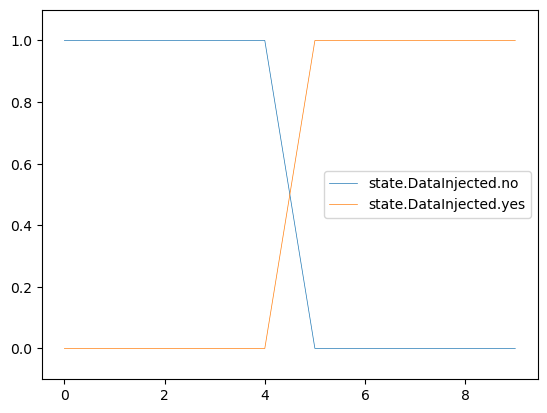

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,1.000000,0.000000,Nop,ManipulateData,file_write
5,0.032399,0.967601,Nop,Exit,none
6,0.002346,0.997653,Nop,Nop,none
7,0.001987,0.998013,Nop,Nop,none
8,0.001985,0.998015,Nop,Nop,none
9,0.001985,0.998015,Nop,Nop,none


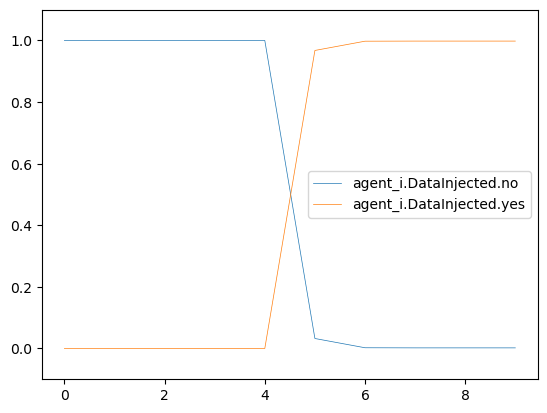

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,1.000000,0.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,1.000000,0.000000,FileRecon,Nop,none,success,active
4,1.000000,0.000000,ManipulateData,Nop,user_files,success,active
5,0.000087,0.999913,Exit,Nop,user_files,failure,inactive
6,0.000087,0.999913,Nop,Nop,user_files,success,inactive
7,0.000087,0.999913,Nop,Nop,user_files,failure,inactive
8,0.000087,0.999913,Nop,Nop,user_files,success,inactive
9,0.000087,0.999913,Nop,Nop,none,success,inactive


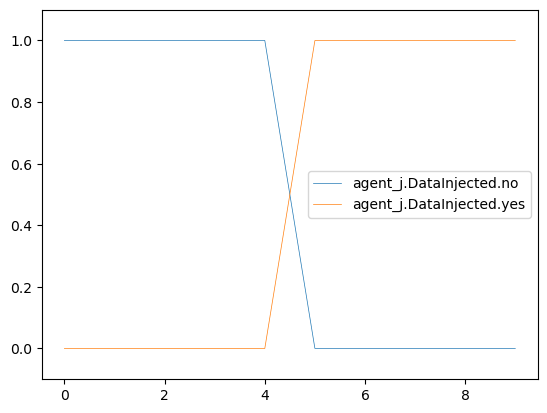

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,Nop,FileRecon
1,0.0,0.0,1.0,Nop,EnumAccounts
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,0.0,1.0,Nop,FileRecon
4,0.0,0.0,1.0,Nop,ManipulateData
5,0.0,0.0,1.0,Nop,Exit
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


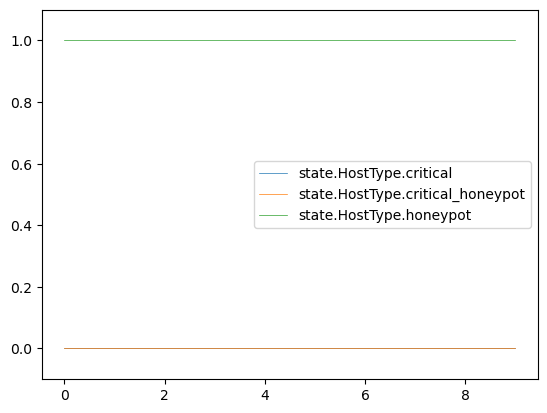

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,0.0,1.0,Nop,Exit,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,none


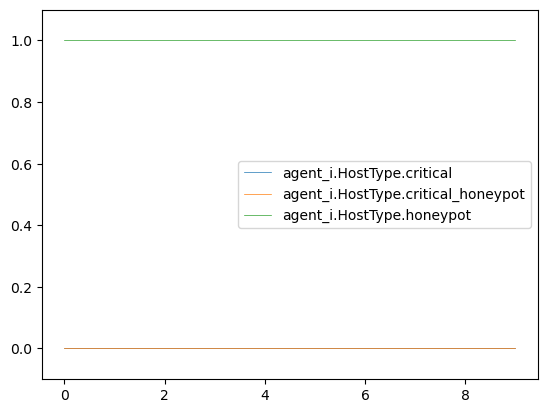

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.0,0.500000,FileRecon,Nop,none,failure,active
1,0.200000,0.0,0.800000,EnumAccounts,Nop,none,success,active
2,0.031184,0.0,0.968816,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.030614,0.0,0.969386,FileRecon,Nop,none,success,active
4,0.005025,0.0,0.994975,ManipulateData,Nop,user_files,success,active
5,0.004414,0.0,0.995586,Exit,Nop,user_files,failure,inactive
6,0.004414,0.0,0.995586,Nop,Nop,user_files,success,inactive
7,0.004414,0.0,0.995586,Nop,Nop,user_files,failure,inactive
8,0.004414,0.0,0.995586,Nop,Nop,user_files,success,inactive
9,0.004414,0.0,0.995586,Nop,Nop,none,success,inactive


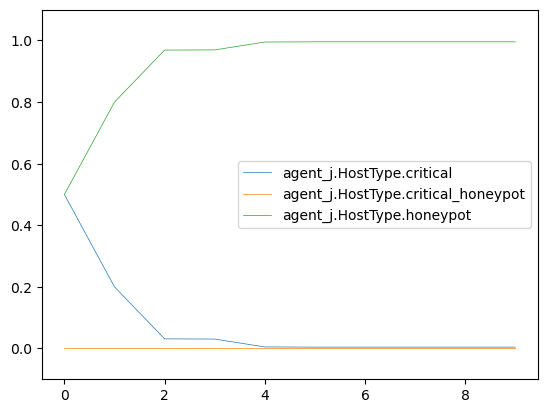

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


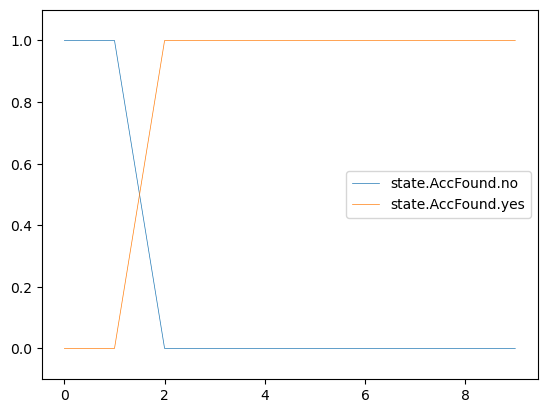

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,0.011249,0.988751,DeployDataDecoys,PrivEscAcc,su_login
3,0.009686,0.990314,Nop,FileRecon,file_enum
4,0.009684,0.990316,Nop,ManipulateData,file_write
5,0.001899,0.998101,Nop,Exit,none
6,0.001877,0.998123,Nop,Nop,none
7,0.001877,0.998123,Nop,Nop,none
8,0.001877,0.998123,Nop,Nop,none
9,0.001877,0.998123,Nop,Nop,none


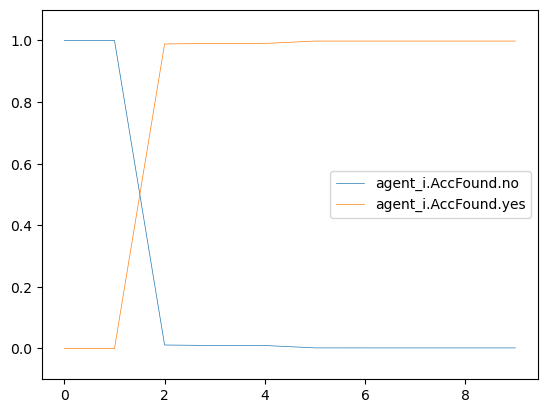

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,failure,active
1,1.000000,0.000000,EnumAccounts,Nop,none,success,active
2,0.101815,0.898186,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.000113,0.999887,FileRecon,Nop,none,success,active
4,0.000053,0.999947,ManipulateData,Nop,user_files,success,active
5,0.000040,0.999960,Exit,Nop,user_files,failure,inactive
6,0.000040,0.999960,Nop,Nop,user_files,success,inactive
7,0.000040,0.999960,Nop,Nop,user_files,failure,inactive
8,0.000040,0.999960,Nop,Nop,user_files,success,inactive
9,0.000040,0.999960,Nop,Nop,none,success,inactive


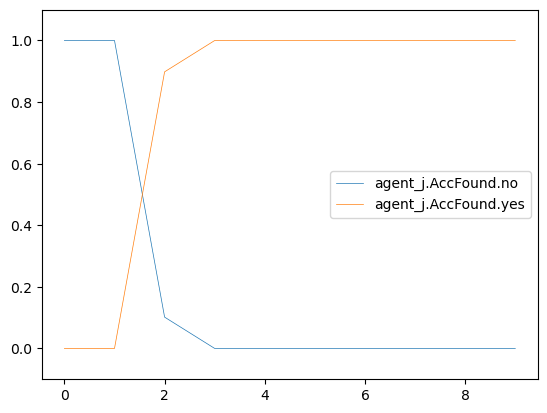

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


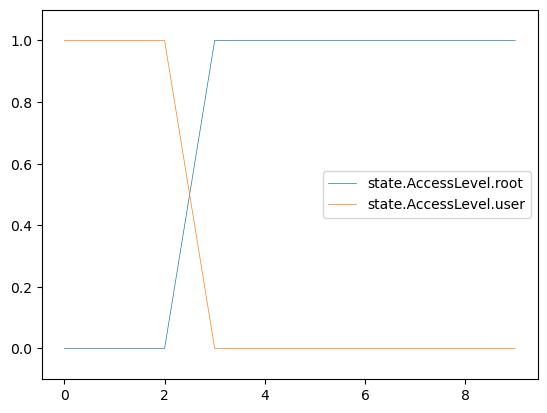

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,EnumAccounts,file_enum
2,0.000000,1.000000,DeployDataDecoys,PrivEscAcc,su_login
3,0.990261,0.009739,Nop,FileRecon,file_enum
4,0.990285,0.009715,Nop,ManipulateData,file_write
5,0.998095,0.001905,Nop,Exit,none
6,0.998120,0.001879,Nop,Nop,none
7,0.998121,0.001879,Nop,Nop,none
8,0.998121,0.001879,Nop,Nop,none
9,0.998121,0.001879,Nop,Nop,none


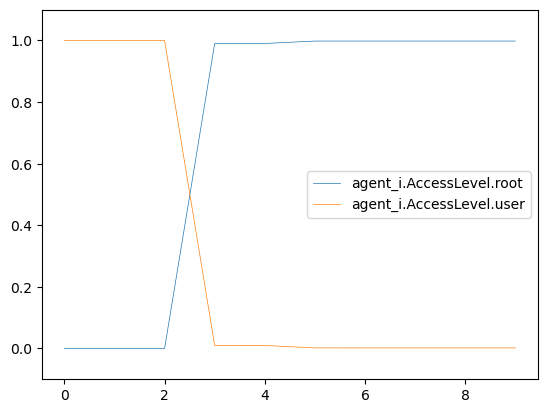

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.000000,1.000000,FileRecon,Nop,none,failure,active
1,0.000000,1.000000,EnumAccounts,Nop,none,success,active
2,0.000000,1.000000,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.999887,0.000113,FileRecon,Nop,none,success,active
4,0.999947,0.000053,ManipulateData,Nop,user_files,success,active
5,0.999960,0.000040,Exit,Nop,user_files,failure,inactive
6,0.999960,0.000040,Nop,Nop,user_files,success,inactive
7,0.999960,0.000040,Nop,Nop,user_files,failure,inactive
8,0.999960,0.000040,Nop,Nop,user_files,success,inactive
9,0.999960,0.000040,Nop,Nop,none,success,inactive


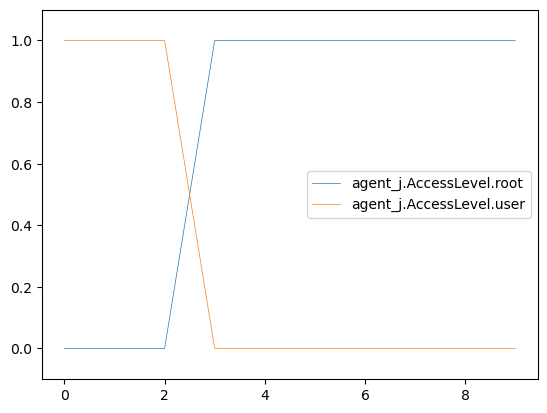

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


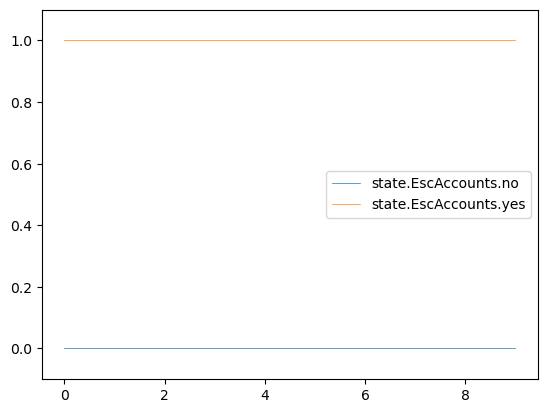

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,DeployDataDecoys,PrivEscAcc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Exit,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


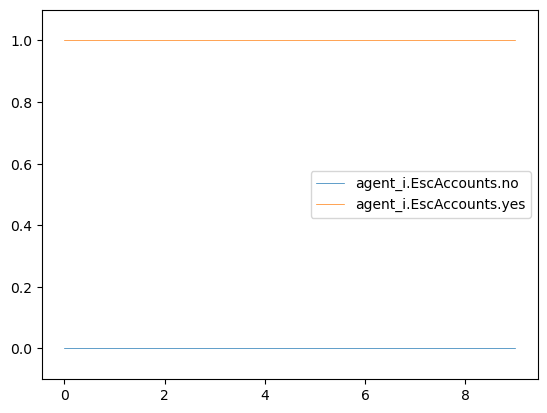

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,failure,active
1,0.500000,0.500000,EnumAccounts,Nop,none,success,active
2,0.100806,0.899194,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.000112,0.999888,FileRecon,Nop,none,success,active
4,0.000053,0.999947,ManipulateData,Nop,user_files,success,active
5,0.000039,0.999961,Exit,Nop,user_files,failure,inactive
6,0.000039,0.999961,Nop,Nop,user_files,success,inactive
7,0.000039,0.999961,Nop,Nop,user_files,failure,inactive
8,0.000039,0.999961,Nop,Nop,user_files,success,inactive
9,0.000039,0.999961,Nop,Nop,none,success,inactive


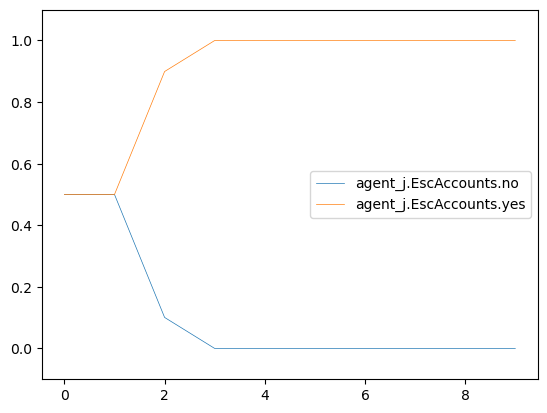

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,Nop,FileRecon
1,0.0,1.0,Nop,EnumAccounts
2,0.0,1.0,DeployDataDecoys,PrivEscAcc
3,0.0,1.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


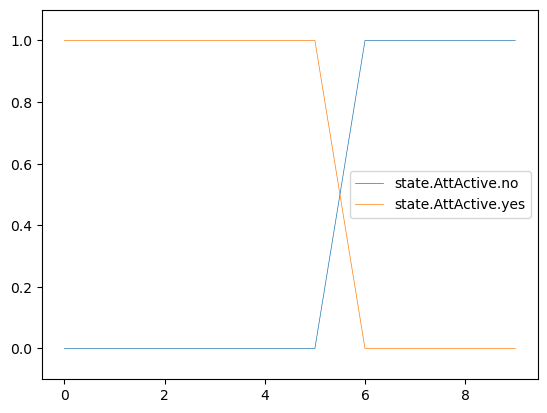

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,5.000000e-01,5.000000e-01,Nop,FileRecon,file_enum
1,1.020408e-02,9.897959e-01,Nop,EnumAccounts,file_enum
2,1.179412e-04,9.998821e-01,DeployDataDecoys,PrivEscAcc,su_login
3,1.234496e-06,9.999988e-01,Nop,FileRecon,file_enum
4,9.572710e-08,9.999998e-01,Nop,ManipulateData,file_write
5,5.032518e-04,9.994968e-01,Nop,Exit,none
6,9.995838e-01,4.160812e-04,Nop,Nop,none
7,9.999952e-01,4.804316e-06,Nop,Nop,none
8,1.000000e+00,1.556506e-08,Nop,Nop,none
9,1.000000e+00,4.660682e-11,Nop,Nop,none


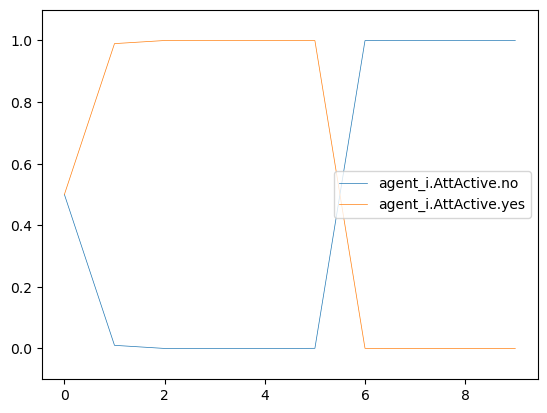

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,none,failure,active
1,0.0,1.0,EnumAccounts,Nop,none,success,active
2,0.0,1.0,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.0,1.0,FileRecon,Nop,none,success,active
4,0.0,1.0,ManipulateData,Nop,user_files,success,active
5,0.0,1.0,Exit,Nop,user_files,failure,inactive
6,1.0,0.0,Nop,Nop,user_files,success,inactive
7,1.0,0.0,Nop,Nop,user_files,failure,inactive
8,1.0,0.0,Nop,Nop,user_files,success,inactive
9,1.0,0.0,Nop,Nop,none,success,inactive


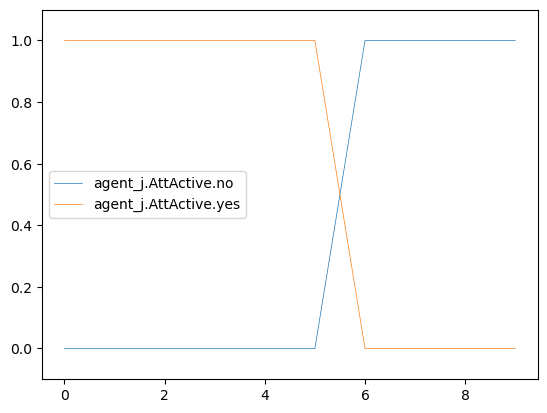

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,1.0,0.0,Nop,ManipulateData
5,1.0,0.0,Nop,Exit
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


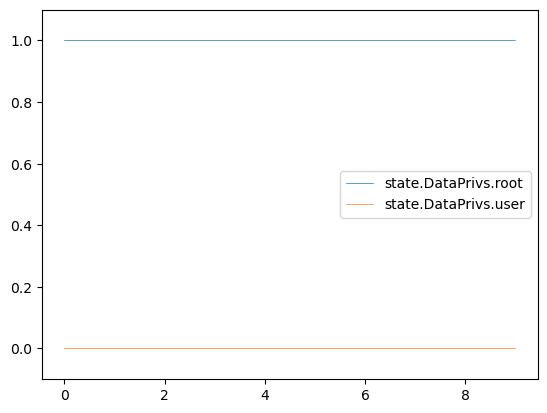

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,DeployDataDecoys,PrivEscAcc,su_login
3,1.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,Nop,Exit,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


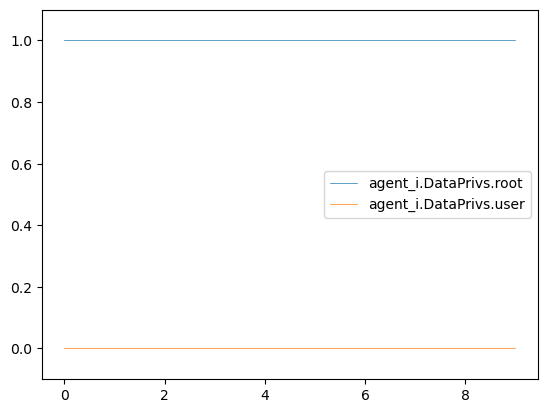

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,none,failure,active
1,0.608108,0.391892,EnumAccounts,Nop,none,success,active
2,0.608108,0.391892,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.608108,0.391892,FileRecon,Nop,none,success,active
4,0.641991,0.358009,ManipulateData,Nop,user_files,success,active
5,0.649545,0.350455,Exit,Nop,user_files,failure,inactive
6,0.649545,0.350455,Nop,Nop,user_files,success,inactive
7,0.649545,0.350455,Nop,Nop,user_files,failure,inactive
8,0.649545,0.350455,Nop,Nop,user_files,success,inactive
9,0.649545,0.350455,Nop,Nop,none,success,inactive


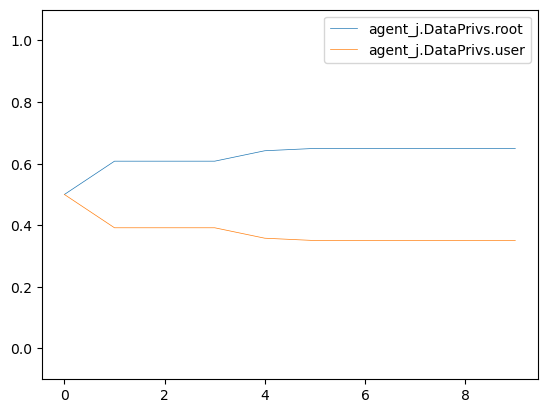

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,Nop,FileRecon
1,1.0,0.0,Nop,EnumAccounts
2,1.0,0.0,DeployDataDecoys,PrivEscAcc
3,1.0,0.0,Nop,FileRecon
4,0.0,1.0,Nop,ManipulateData
5,0.0,1.0,Nop,Exit
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


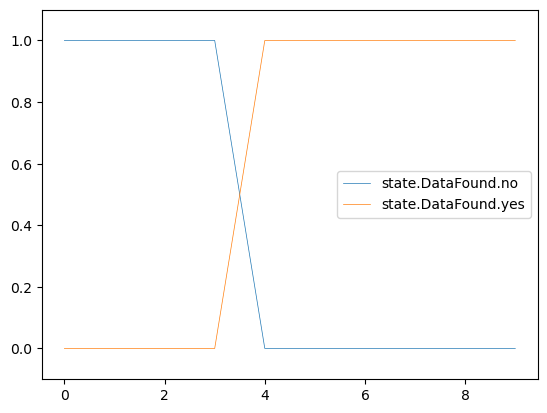

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,1.000000,0.000000,Nop,EnumAccounts,file_enum
2,1.000000,0.000000,DeployDataDecoys,PrivEscAcc,su_login
3,1.000000,0.000000,Nop,FileRecon,file_enum
4,0.207772,0.792228,Nop,ManipulateData,file_write
5,0.029292,0.970708,Nop,Exit,none
6,0.002037,0.997963,Nop,Nop,none
7,0.001967,0.998033,Nop,Nop,none
8,0.001967,0.998033,Nop,Nop,none
9,0.001967,0.998033,Nop,Nop,none


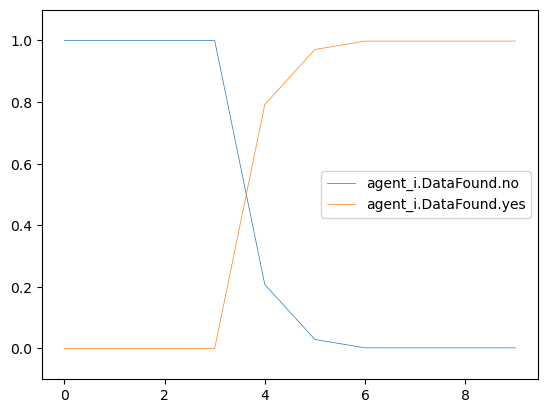

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.HostObs',agent_j.observation.ActionResult',agent_j.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,none,failure,active
1,0.972973,0.027027,EnumAccounts,Nop,none,success,active
2,0.972973,0.027027,PrivEscAcc,DeployDataDecoys,none,success,active
3,0.972973,0.027027,FileRecon,Nop,none,success,active
4,0.080265,0.919735,ManipulateData,Nop,user_files,success,active
5,0.000087,0.999913,Exit,Nop,user_files,failure,inactive
6,0.000087,0.999913,Nop,Nop,user_files,success,inactive
7,0.000087,0.999913,Nop,Nop,user_files,failure,inactive
8,0.000087,0.999913,Nop,Nop,user_files,success,inactive
9,0.000087,0.999913,Nop,Nop,none,success,inactive


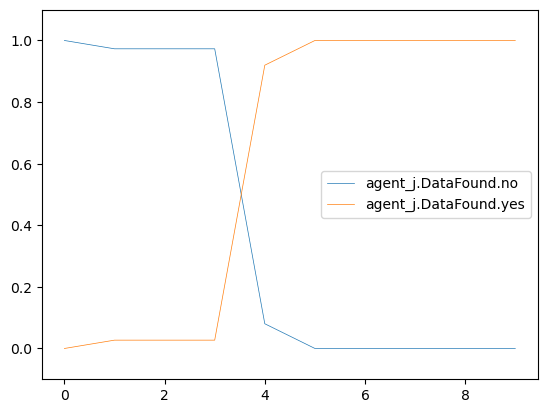

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)
    

# Get divergence
def print_divergence():
    divs = []
    
    for trace in TRACE_FILES:
        data = load_json(trace)
    
        dataframe = pandas.json_normalize(data)    
        state_vars = get_state_vars(dataframe.columns)
        
        agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
        agent_j_data = filter_columns_by_agent(dataframe, "agent_j")

    for i in range(len(keys)):
        print(f"Plotting for {keys[i]}")

        i_means = numpy.mean(divs[i][0], axis=0)
        i_dev = numpy.std(divs[i][0], axis=0)
        plotter.errorbar(numpy.linspace(1, i_means.shape[0], i_means.shape[0]), i_means, fmt='r-.', yerr=i_dev, linewidth=0.5)

        if len(divs[i]) > 1:
            j_means = numpy.mean(divs[i][1], axis=0)
            j_dev = numpy.std(divs[i][1], axis=0)
            plotter.errorbar(numpy.linspace(1, j_means.shape[0], j_means.shape[0]), j_means, fmt='b-.', yerr=j_dev, linewidth=0.5)
            # plotter.plot(divs[i][1].T, 'b-.', linewidth=0.5)

        plotter.ylim(-0.1, 2)
        plotter.show()

    